# Eval runs

In [1]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

pd.set_option('display.max_columns', None)

In [2]:
def read_metrics_file(file_path):
    """
    Read metrics from a single file.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()
    metrics = {}
    metric_lists = {}
    in_metric_lists = False
    
    for line in lines:
        if line.strip():  # Skip empty lines
            if line.startswith('Metric Lists:'):
                in_metric_lists = True
            elif not in_metric_lists:
                metric_name, metric_value = line.split(':')
                metrics[metric_name.strip()] = float(metric_value.strip())
            else:
                metric_list_name, metric_list_values = line.split(':')
                metric_list_values = [float(value.strip()) for value in metric_list_values.split()]
                metric_lists[metric_list_name.strip()] = metric_list_values
    
    metrics.update(metric_lists)
    return metrics

def read_config_file(file_path):
    """
    Read configuration settings from a config.txt file.
    """
    with open(file_path, 'r') as file:
        config = json.load(file)
    return config

def read_metrics_and_config_from_directory(directory):
    """
    Read metrics from all files in a directory and its subdirectories recursively.
    """
    all_metrics = []
    all_config = []
    all_folder_names = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('metrics.txt'):  # Consider only text files
                file_path = os.path.join(root, file)
                metrics = read_metrics_file(file_path)
                all_metrics.append(metrics)
                folder_name = os.path.basename(os.path.normpath(root))
                all_folder_names.append(folder_name)
            #if file.endswith('config.txt'):  # Consider only text files
                file_path = os.path.join(root, file.replace('metrics','config'))
                config = read_config_file(file_path)
                all_config.append(config)
    
    return all_metrics, all_config, all_folder_names

def load_dataframe(directory):
    # Read metrics from all files in the directory
    all_metrics, all_config, all_folder_names = read_metrics_and_config_from_directory(directory)
    # Combine all_folder_names into a DataFrame
    folder_names_df = pd.DataFrame(all_folder_names, columns=['run_name'])
    # Combine all_metrics into a DataFrame
    metrics_df = pd.DataFrame(all_metrics)
    # Combine all_config into a DataFrame
    config_df = pd.DataFrame(all_config)
    # Concatenate metrics_df and config_df along axis 1 (columns)
    combined_df = pd.concat([metrics_df, config_df, folder_names_df], axis=1)

    combined_df['model_name'] = combined_df['model_name'].str.replace('VGGFace','', regex=False)
    combined_df= combined_df[combined_df['model_name'] != 'Shufflenet']
    combined_df= combined_df[combined_df['model_name'] != 'Shufflenet_IMAGENET1K_V1']
    combined_df= combined_df[combined_df['model_name'] != 'ShufflenetRGBDLateFusion']
    combined_df= combined_df[combined_df['model_name'] != 'ShufflenetRGBDLateFusion_IMAGENET1K_V1']
    return combined_df

# Define the directory containing metric files
#directory = 'C:\\Users\\Eduard-Desktop\\Anaconda\\3D-Face\\train_cnn_network\\output'
directory = 'H:\\Maurer\\runresults'
combined_df = load_dataframe(directory)
# Display the combined DataFrame
combined_df.head()
#combined_df[combined_df['description'] == 'testLoss'].head(20)

Validation Accuracy  Validation AccuracyTop5  Validation Precision  \
0               0.4953                   0.8694                0.4917   
1               0.6391                   0.8752                0.6964   
2               0.6683                   0.9385                0.6507   
3               0.6480                      NaN                0.6480   
4               0.3317                   0.7776                0.3472   

   Validation Recall  Validation F1-score  Validation Rank-1 Recognition Rate  \
0             0.5424               0.4854                             49.5294   
1             0.6977               0.6556                             63.9130   
2             0.6893               0.6561                             66.8293   
3             0.6480               0.6480                             64.8000   
4             0.3659               0.3127                             33.1707   

   depth_facescape Test Accuracy  depth_facescape Test AccuracyTop5  \
0                         0.0364                             0.1060   
1                         0.0860                             0.1954   
2                         0.0907                             0.2186   
3                            NaN                                NaN   
4                            NaN                                NaN   

   depth_facescape Test Precision  depth_facescape Test Recall  \
0                          0.0436                       0.0364   
1                          0.2027                       0.0862   
2                          0.1290                       0.0910   
3                             NaN                          NaN   
4                             NaN                          NaN   

   depth_facescape Test F1-score  \
0                         0.0332   
1                         0.0893   
2                         0.0915   
3                            NaN   
4                            NaN   

   depth_facescape Test Rank-1 Recognition Rate  depth_texas Test Accuracy  \
0                                        3.6379                     0.1655   
1                                        8.6005                     0.4763   
2                                        9.0723                     0.3514   
3                                           NaN                        NaN   
4                                           NaN                        NaN   

   depth_texas Test AccuracyTop5  depth_texas Test Precision  \
0                         0.3098                      0.1767   
1                         0.6834                      0.5688   
2                         0.5198                      0.4082   
3                            NaN                         NaN   
4                            NaN                         NaN   

   depth_texas Test Recall  depth_texas Test F1-score  \
0                   0.3428                     0.1617   
1                   0.8142                     0.5626   
2                   0.6973                     0.3953   
3                      NaN                        NaN   
4                      NaN                        NaN   

   depth_texas Test Rank-1 Recognition Rate accuracy_list accuracytop5_list  \
0                                   16.5537      [0.4953]          [0.8694]   
1                                   47.6283      [0.6391]          [0.8752]   
2                                   35.1404      [0.6683]          [0.9376]   
3                                       NaN       [0.648]               NaN   
4                                       NaN      [0.3317]          [0.7776]   

  precision_list recall_list   f1_list  \
0       [0.4917]    [0.5424]  [0.4854]   
1       [0.6964]    [0.6977]  [0.6556]   
2       [0.6503]    [0.6893]   [0.656]   
3        [0.648]     [0.648]   [0.648]   
4       [0.3472]    [0.3659]  [0.3127]   

                                     train_loss_list val_loss_list  \
0                                        

In [3]:
def add_annotations(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height,
                 f'{height:.2f}',
                 ha='center', va='bottom')
        
def plot_bar_with_annotations(df, bar_columns, labels, title_suffix, color_list, rotation=45, annotate=True):
    n_models = df.shape[0]
    indices = np.arange(n_models)
    width = 0.25

    plt.figure(figsize=(15, 8))
    
    bars_list = []
    for i, col in enumerate(bar_columns):
        bar = plt.bar(indices + (i - 1) * width, df[col], width,
                      label=labels[i], color=color_list[i])
        bars_list.append(bar)
        if annotate:
            add_annotations(bar)
    
    plt.xlabel('Model Name')
    plt.ylabel('Accuracy')
    plt.title(f'Comparison of {title_suffix} Accuracies')
    plt.xticks(indices, df['model_name'], rotation=rotation, ha='right')
    plt.legend(loc='best')
    plt.tight_layout()

# Function to plot a scatterplot with correlation line
def plot_scatter_with_correlation_line(x, y, labels, xlabel, ylabel, title):
    plt.figure(figsize=(15, 6))
    coefficients = np.polyfit(x, y, 1)
    poly = np.poly1d(coefficients)
    val_linspace = np.linspace(min(x), max(x), len(x))
    plt.scatter(x, y, color='green')
    plt.plot(val_linspace, poly(val_linspace), color='blue', linestyle='dashed', linewidth=2)
    for i, label in enumerate(labels):
        plt.text(x.iloc[i], y.iloc[i], label, fontsize=9, ha='right')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()
    correlation_coefficient, _ = pearsonr(x, y)
    print(f"Correlation coefficient: {correlation_coefficient:.3f}")
    
def plot_average_accuracies(df, accuracy_labels, title):
    plt.figure(figsize=(8, 6))
    bars = plt.bar(accuracy_labels, df.mean(), color=['blue', 'green', 'red'])
    add_annotations(bars)
    plt.ylabel('Average Accuracy')
    plt.title(title)
    plt.tight_layout()
    
    
def analyze_accuracies(combined_df, description, test_set_prefix):
    test_set_prefix = test_set_prefix.lower()
    
    facescape_test_accuracy_column = f'{test_set_prefix}_facescape Test Accuracy'
    texas_test_accuracy_column = f'{test_set_prefix}_texas Test Accuracy'
    
    combined_df_selected = combined_df[combined_df['description'] == description].copy()
    combined_df_selected['max_accuracy'] = combined_df_selected['accuracy_list'].apply(max)
    combined_df_selected.sort_values('model_name', inplace=True)
    
    plot_bar_with_annotations(
        combined_df_selected,
        ['max_accuracy', facescape_test_accuracy_column, texas_test_accuracy_column],
        ['Validation Accuracy', 'Facescape Test Accuracy', 'Texas Test Accuracy'],
        f'Validation, Facescape Test, and Texas Test',
        ['skyblue', 'orange', 'lightgreen']
    )
    plt.show()
    plot_scatter_with_correlation_line(
        combined_df_selected['max_accuracy'],
        combined_df_selected[facescape_test_accuracy_column],
        combined_df_selected['model_name'],
        'Validation Accuracy',
        f'{test_set_prefix.capitalize()} Facescape Test Accuracy',
        f'Validation vs. {test_set_prefix.capitalize()} Facescape Test Accuracy'
    )
    plot_scatter_with_correlation_line(
        combined_df_selected['max_accuracy'],
        combined_df_selected[texas_test_accuracy_column],
        combined_df_selected['model_name'],
        'Validation Accuracy',
        f'{test_set_prefix.capitalize()} Texas Test Accuracy',
        f'Validation vs. {test_set_prefix.capitalize()} Texas Test Accuracy'
    )
    plot_average_accuracies(
        combined_df_selected[['max_accuracy', facescape_test_accuracy_column, texas_test_accuracy_column]],
        ['Validation', 'Facescape', 'Texas'],
        'Average Accuracies of Validation, Facescape, and Texas'
    )
    plt.show()
    
    
def plot_bar_with_annotations_and_top5(df, bar_columns, top5_columns, labels, title_suffix, color_list, rotation=45, annotate=True):
    n_models = df.shape[0]
    indices = np.arange(n_models)
    width = 0.25

    plt.figure(figsize=(15, 8))
    
    for i, col in enumerate(bar_columns):
        bars = plt.bar(indices + (i - 1) * width, df[col], width,
                       label=labels[i], color=color_list[i])
        if annotate:
            add_annotations(bars)
    
    # Add a horizontal line for the top-5 accuracies
    for i, col in enumerate(top5_columns):
        line_positions = indices + (i - 1) * width
        for j, value in enumerate(df[col]):
            plt.hlines(y=value, xmin=line_positions[j] - width/2, xmax=line_positions[j] + width/2, 
                       colors=color_list[i], linestyles='dashed')
            plt.text(line_positions[j], value, f'{value:.2f}', 
                     ha='center', va='bottom', color='red')

    plt.xlabel('Model Name')
    plt.ylabel('Accuracy')
    plt.title(f'Comparison of {title_suffix} Accuracies with Top-5')
    plt.xticks(indices, df['model_name'], rotation=rotation, ha='right')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

def analyze_accuracies_withtop5(combined_df, description, test_set_prefix):
    test_set_prefix = test_set_prefix.lower()
    
    facescape_test_accuracy_column = f'{test_set_prefix}_facescape Test Accuracy'
    texas_test_accuracy_column = f'{test_set_prefix}_texas Test Accuracy'
    facescape_test_accuracytop5_column = f'{test_set_prefix}_facescape Test AccuracyTop5'
    texas_test_accuracytop_column = f'{test_set_prefix}_texas Test AccuracyTop5'
    
    max_accuracytop5_column = 'max_accuracytop5'
    
    combined_df_selected = combined_df[combined_df['description'] == description].copy()
    combined_df_selected['max_accuracy'] = combined_df_selected['accuracy_list'].apply(max)
    combined_df_selected['max_accuracytop5'] = combined_df_selected['accuracytop5_list'].apply(max)
    combined_df_selected.sort_values('model_name', inplace=True)
    
    plot_bar_with_annotations_and_top5(
        combined_df_selected,
        ['max_accuracy', facescape_test_accuracy_column, texas_test_accuracy_column],
        [max_accuracytop5_column, facescape_test_accuracytop5_column, texas_test_accuracytop_column],
        ['Validation Accuracy', 'Facescape Test Accuracy', 'Texas Test Accuracy'],
        f'Validation, Facescape Test, and Texas Test',
        ['skyblue', 'orange', 'lightgreen']
    )
    plt.show()
    plot_scatter_with_correlation_line(
        combined_df_selected['max_accuracy'],
        combined_df_selected[facescape_test_accuracy_column],
        combined_df_selected['model_name'],
        'Validation Accuracy',
        f'{test_set_prefix.capitalize()} Facescape Test Accuracy',
        f'Validation vs. {test_set_prefix.capitalize()} Facescape Test Accuracy'
    )
    plot_scatter_with_correlation_line(
        combined_df_selected['max_accuracy'],
        combined_df_selected[texas_test_accuracy_column],
        combined_df_selected['model_name'],
        'Validation Accuracy',
        f'{test_set_prefix.capitalize()} Texas Test Accuracy',
        f'Validation vs. {test_set_prefix.capitalize()} Texas Test Accuracy'
    )
    plot_scatter_with_correlation_line(
        combined_df_selected[max_accuracytop5_column],
        combined_df_selected['max_accuracy'],
        combined_df_selected['model_name'],
        'Validation AccuracyTop5',
        'Validation Accuracy',
        f'Validation vs. AccuracyTop5'
    )
    plot_average_accuracies(
        combined_df_selected[['max_accuracy', facescape_test_accuracy_column, texas_test_accuracy_column]],
        ['Validation', 'Facescape', 'Texas'],
        'Average Accuracies of Validation, Facescape, and Texas'
    )
    plt.show()

### Model comparison RGB

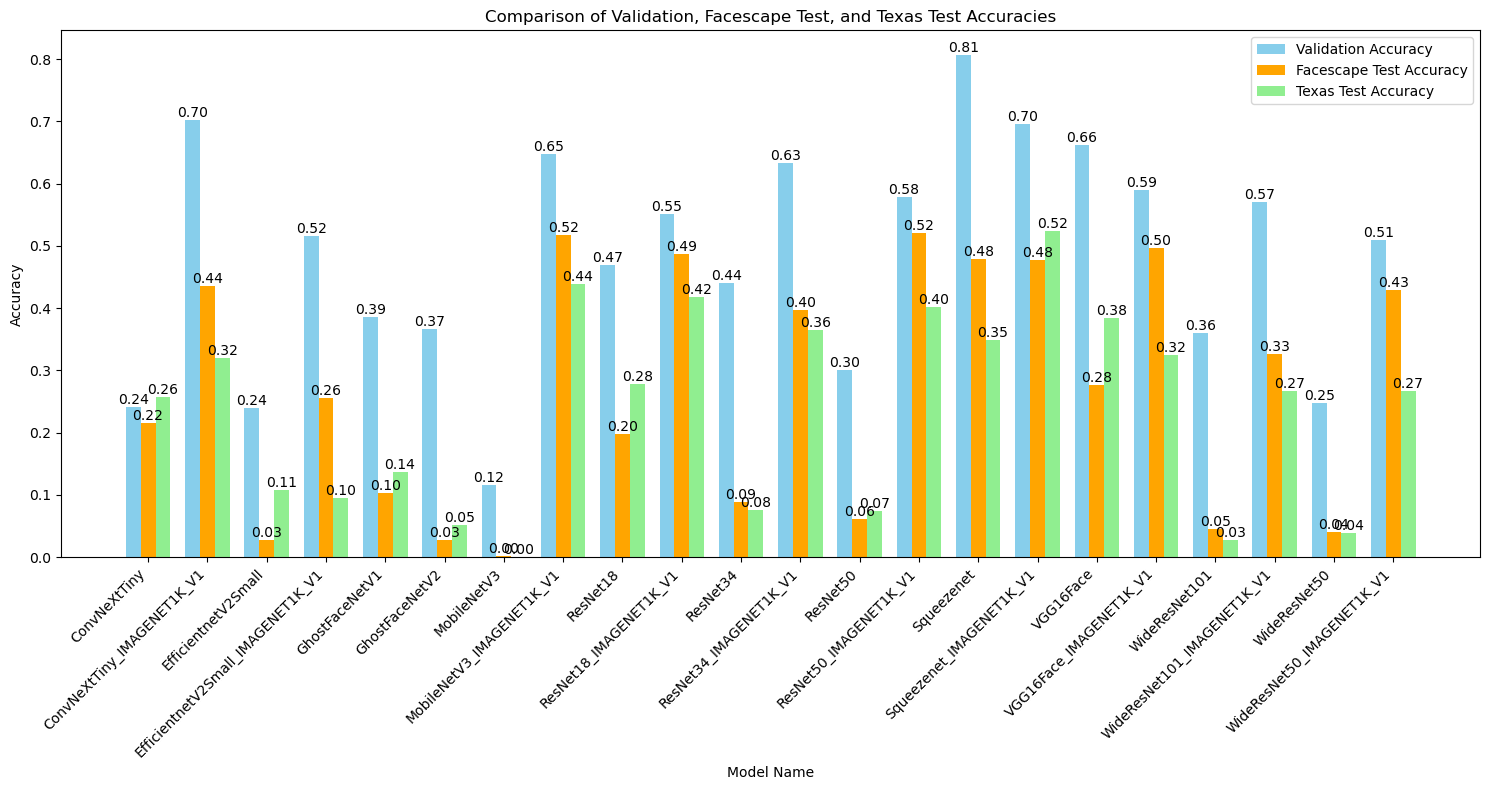

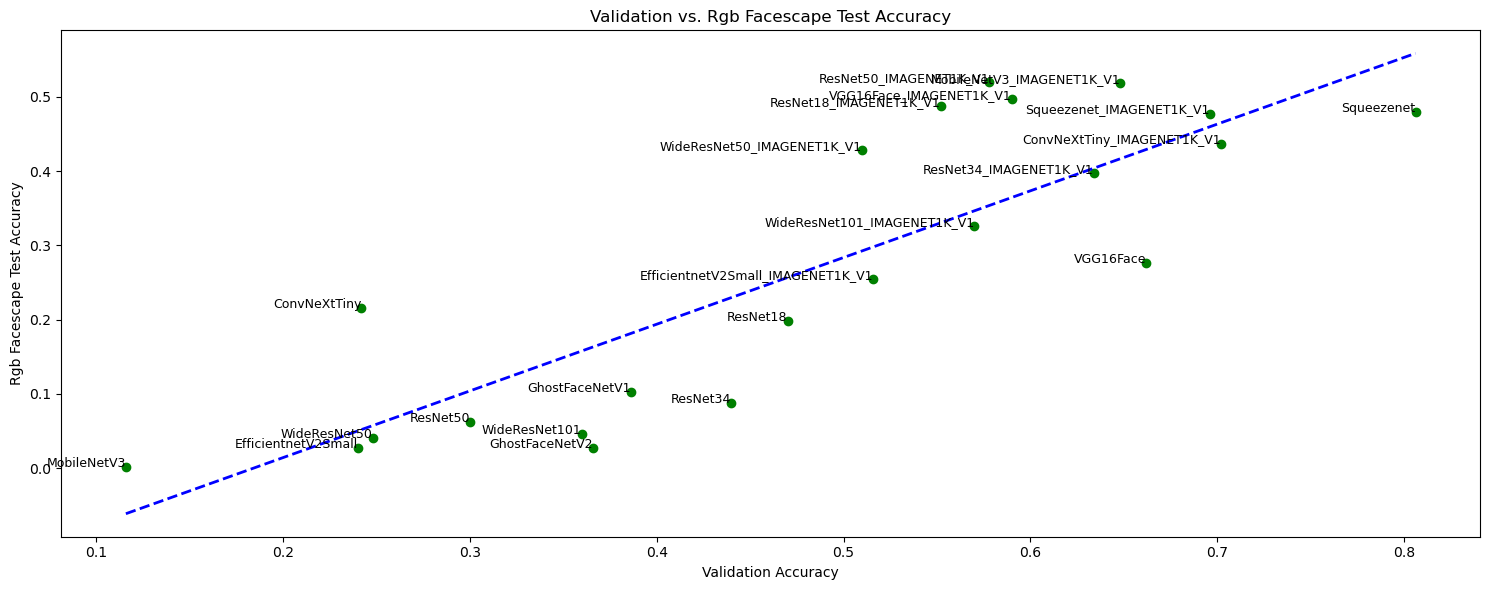

Correlation coefficient: 0.844


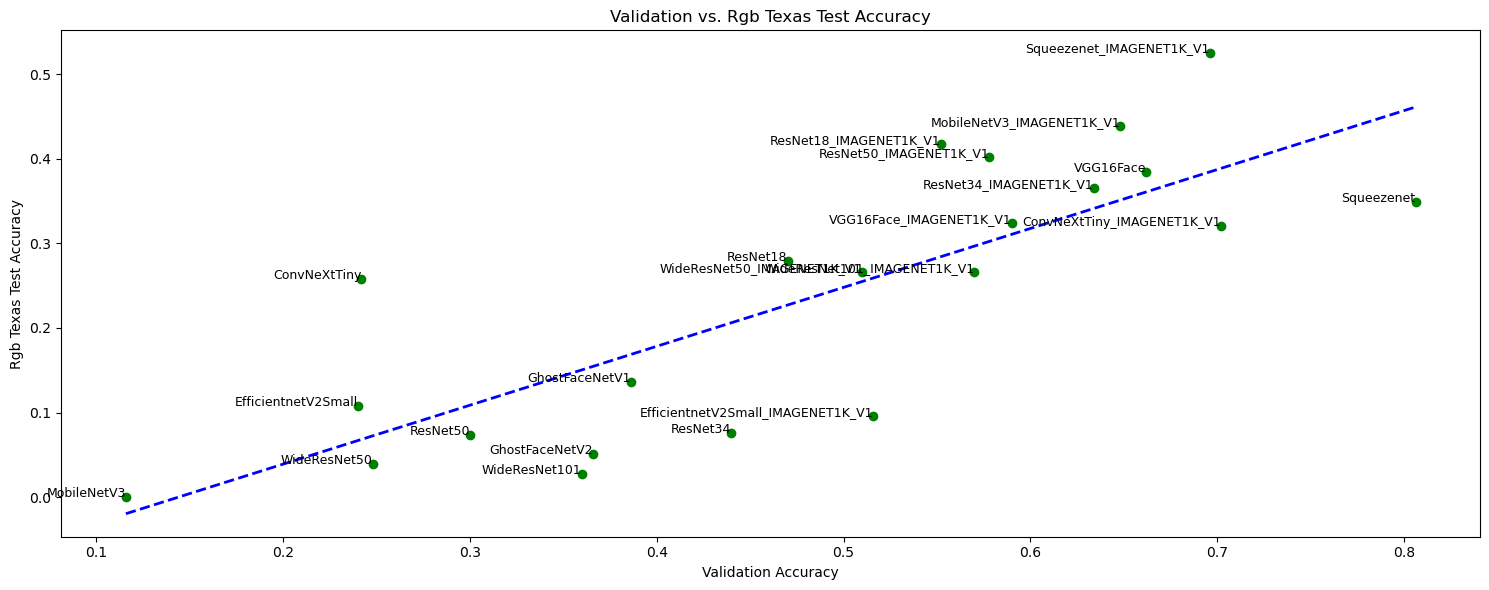

Correlation coefficient: 0.801


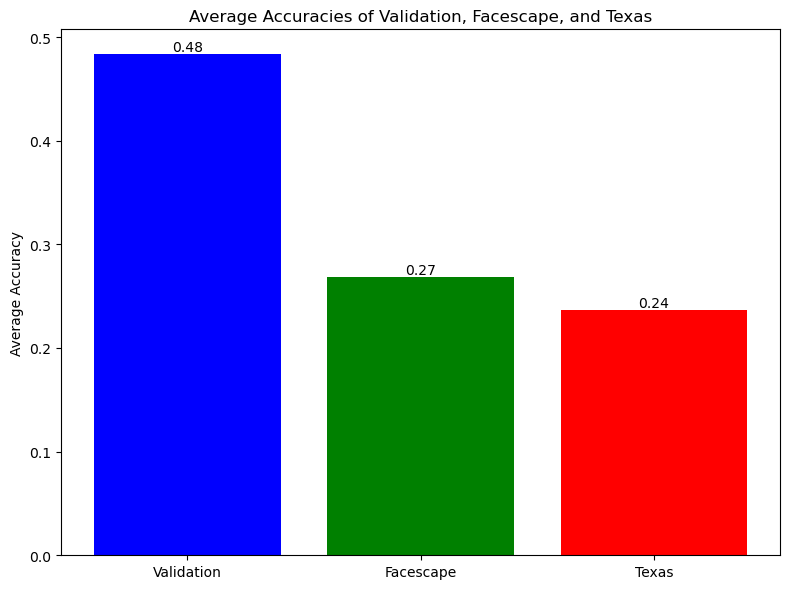

In [7]:
combined_df = load_dataframe(directory)
analyze_accuracies(combined_df, 'test-models-rgb', 'rgb')

## EXP1: testmodels-RGB_11T_46V_SingleTrainSample-enc128-BigHead-TripletMarginLoss_BATCHSIZE8

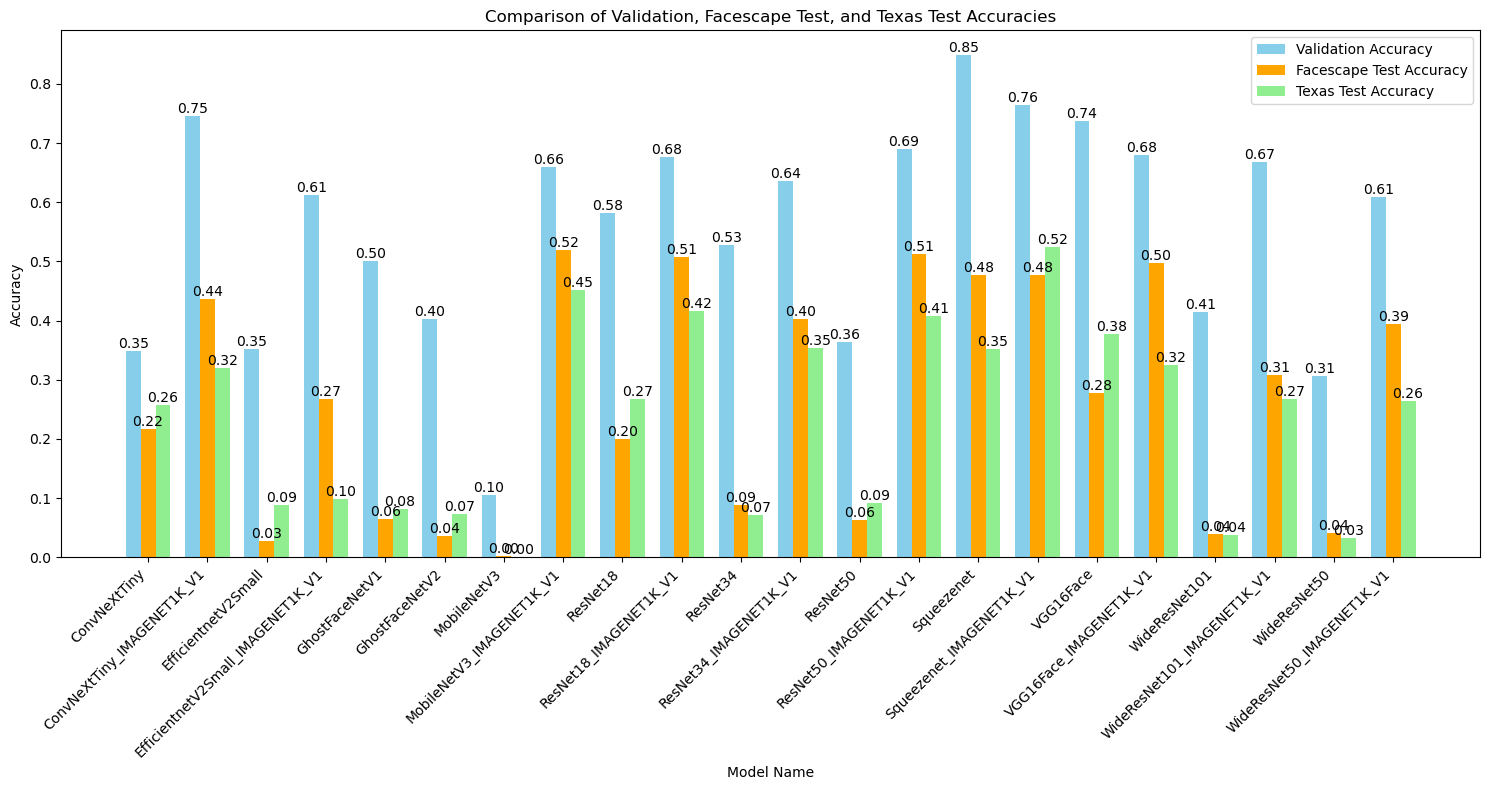

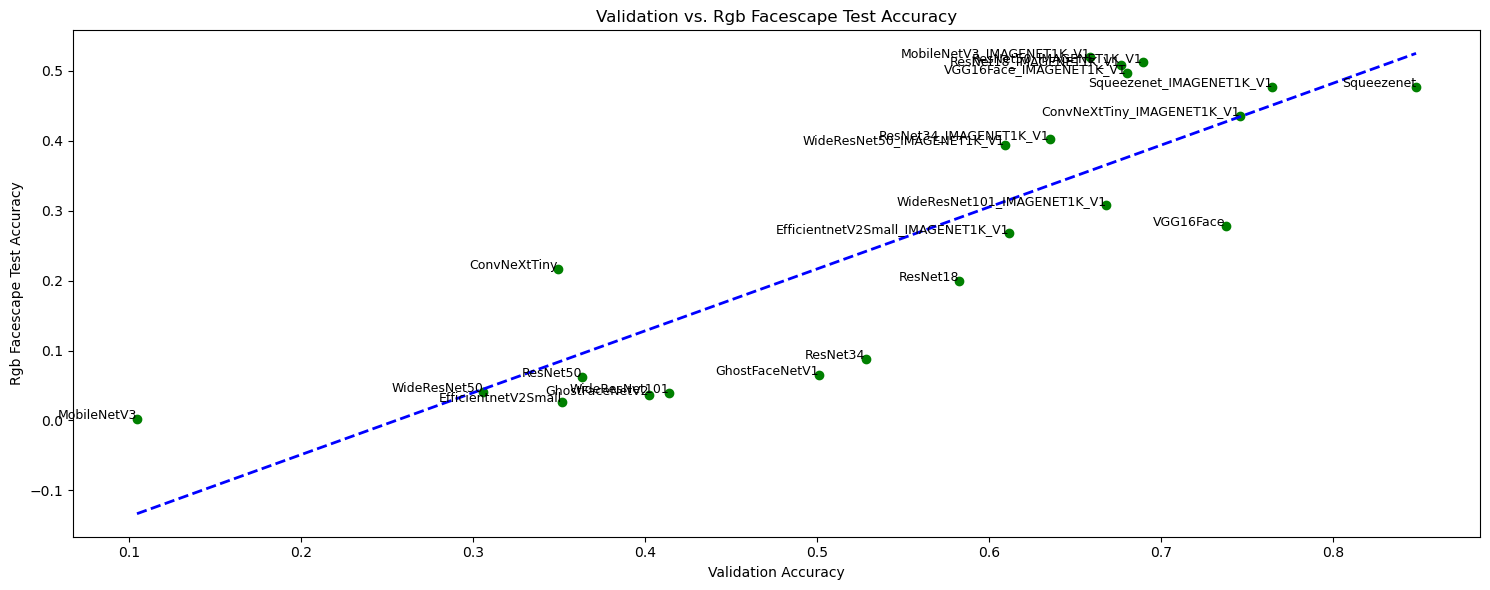

Correlation coefficient: 0.841


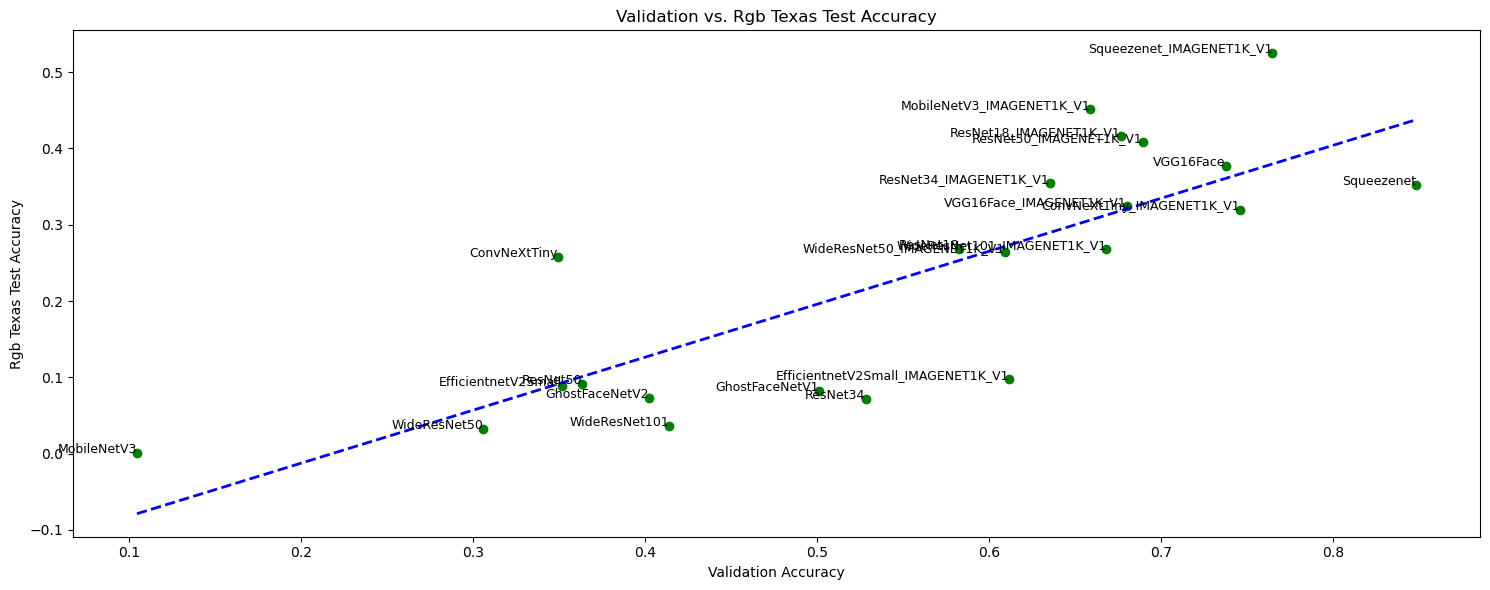

Correlation coefficient: 0.806


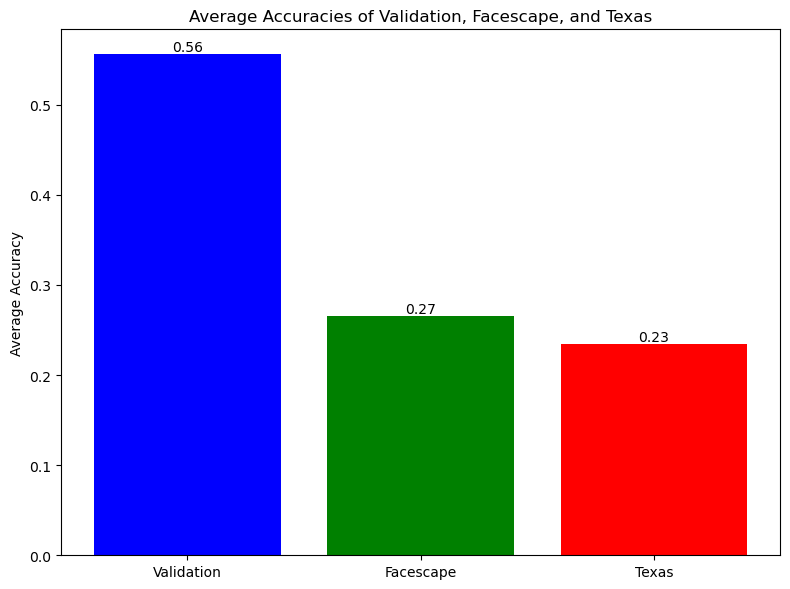

In [8]:
combined_df = load_dataframe(directory)
analyze_accuracies(combined_df, 'EXP1:testmodels-RGB_11T_57V_SingleTrainSample-enc128-BigHead-TripletMarginLoss_BATCHSIZE8', 'rgb')

## EXP2: testmodels-DEPTH_11T_46V_SingleTrainSample-enc128-BigHead-TripletMarginLoss_BATCHSIZE8

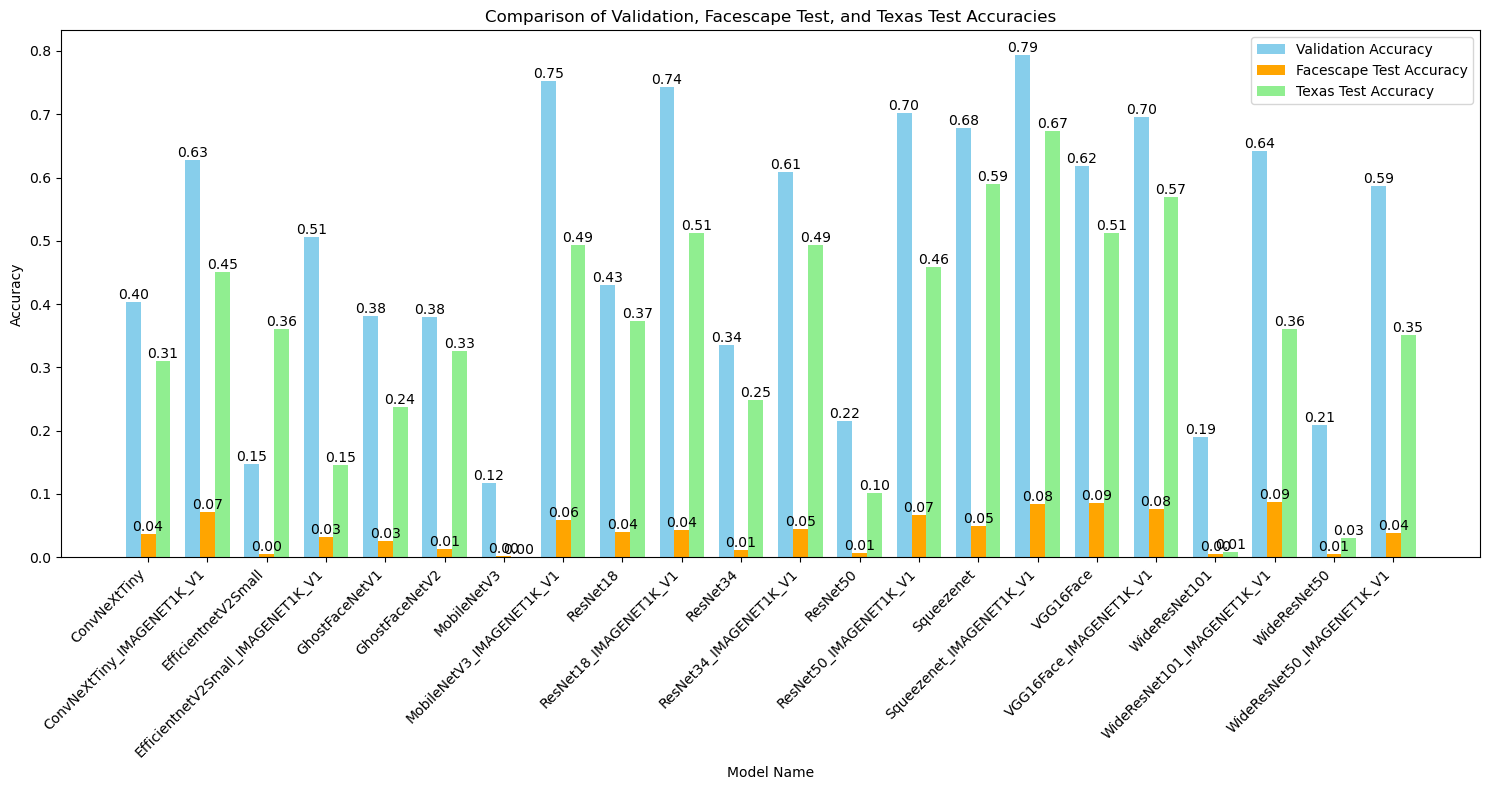

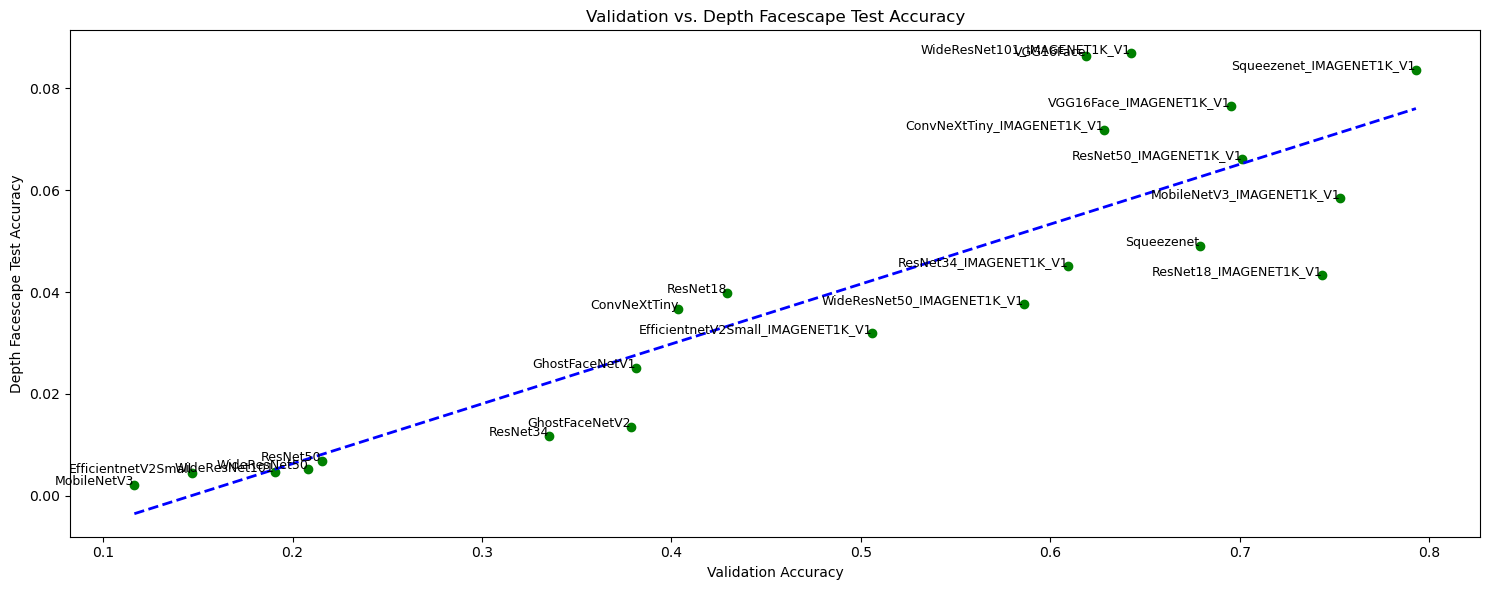

Correlation coefficient: 0.877


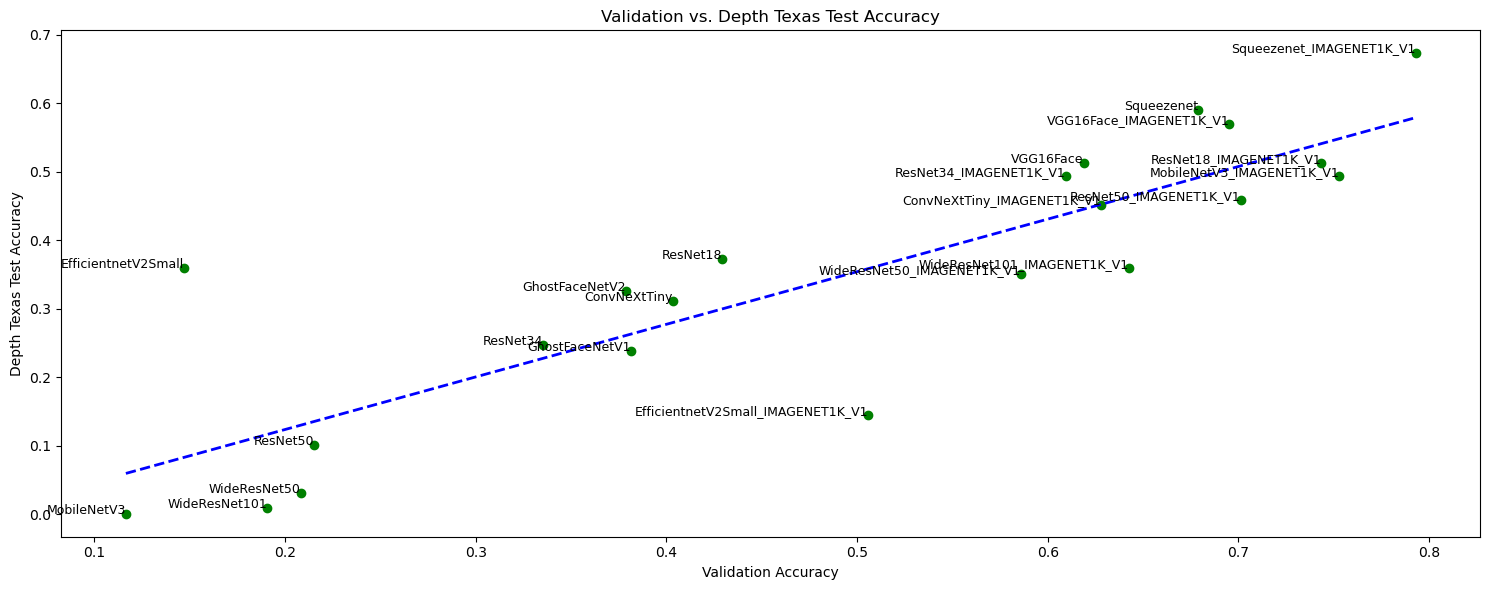

Correlation coefficient: 0.856


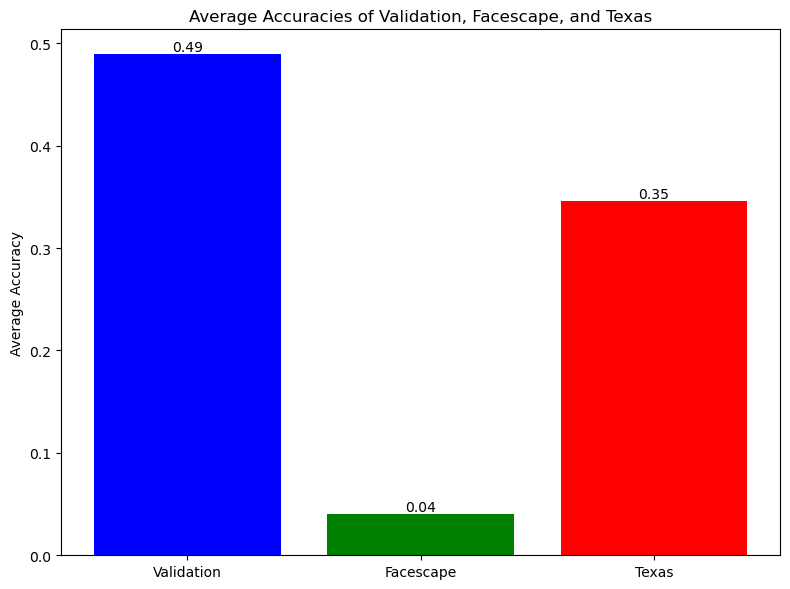

In [9]:
combined_df = load_dataframe(directory)
analyze_accuracies(combined_df, 'EXP2:testmodels-DEPTH_11T_57V_SingleTrainSample-enc128-BigHead-TripletMarginLoss_BATCHSIZE8', 'depth')

## EXP3:testmodels-RGB_11T_46V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8-Epochs3

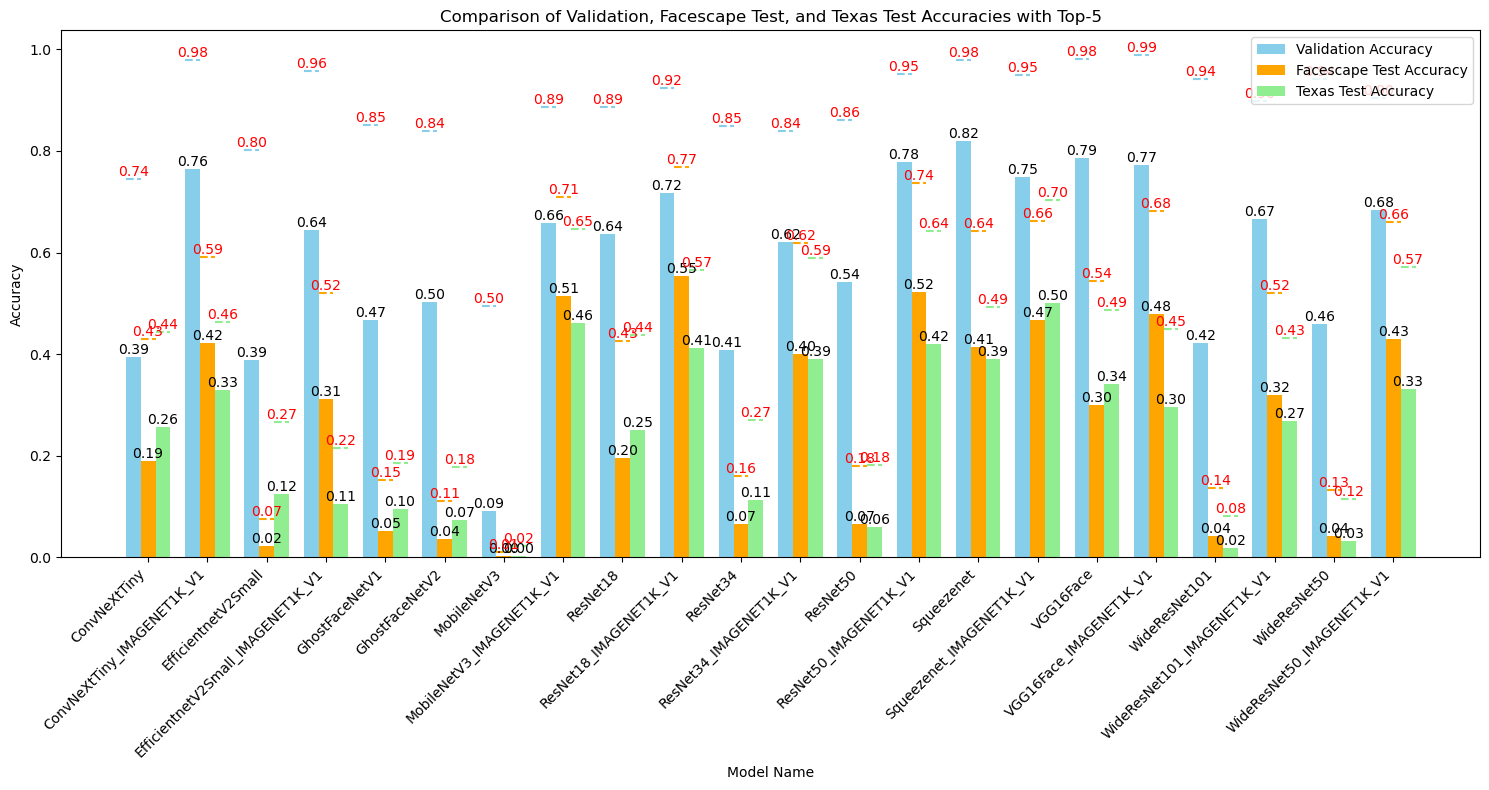

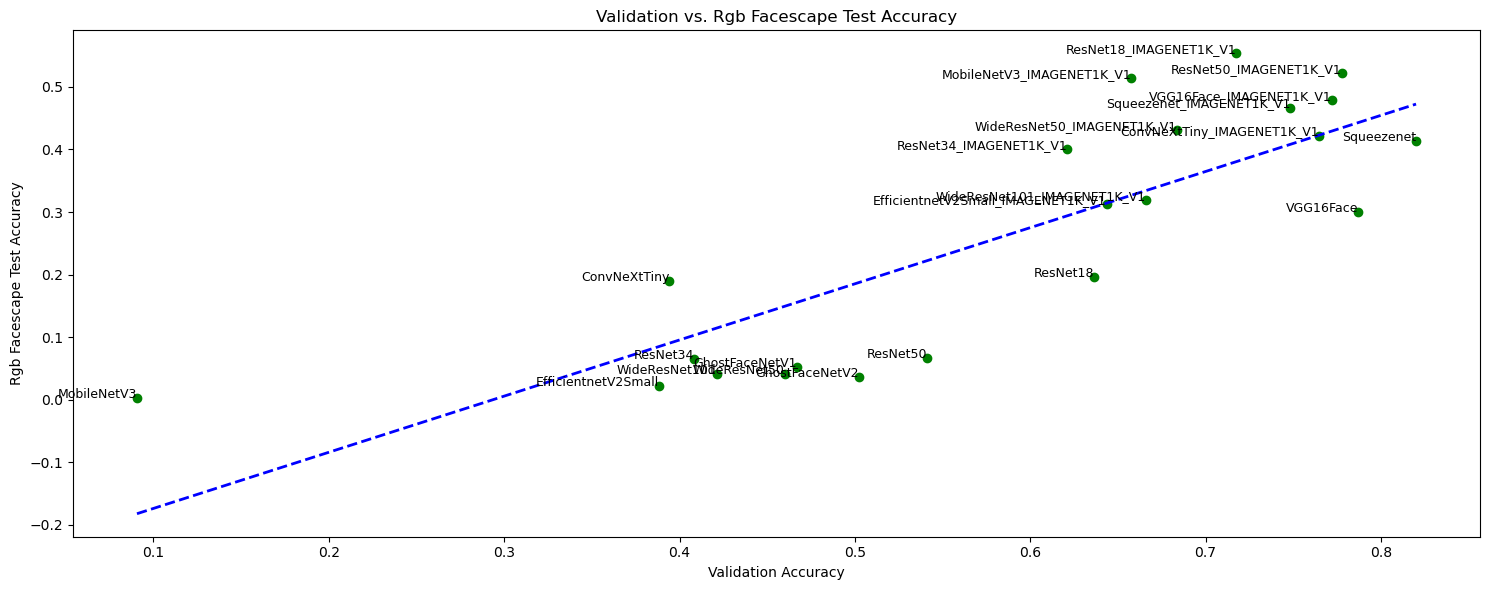

Correlation coefficient: 0.827


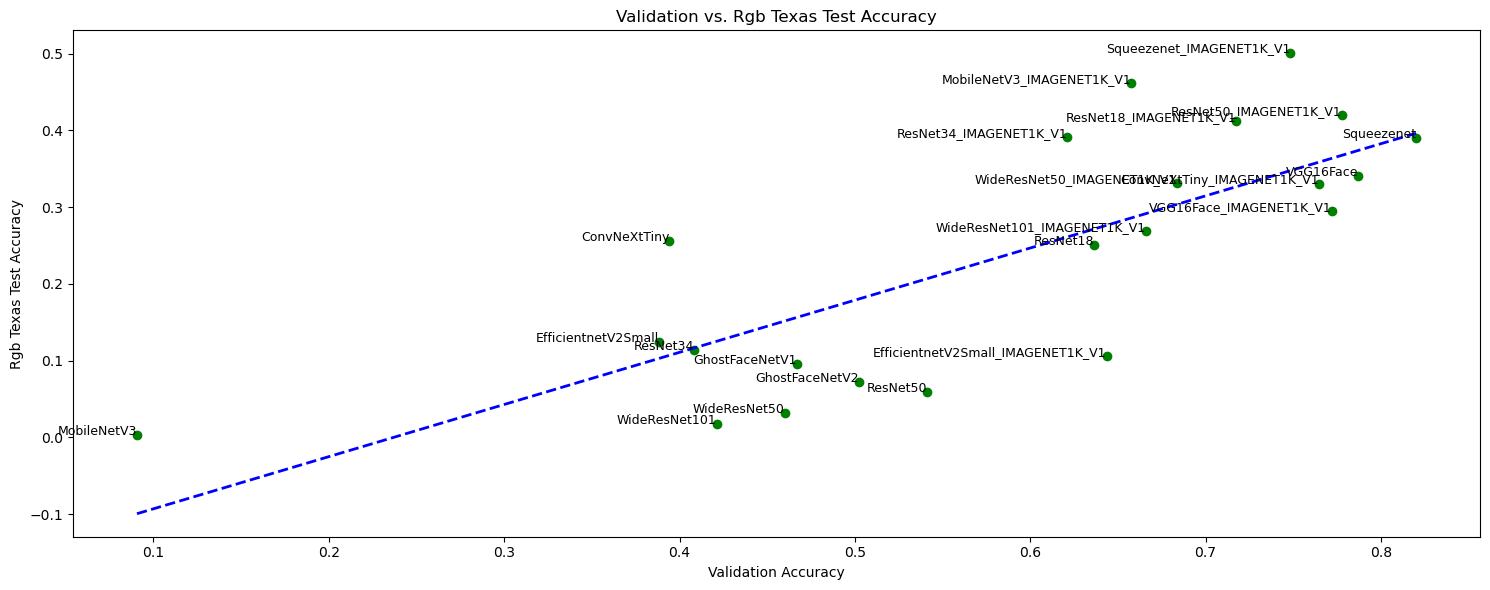

Correlation coefficient: 0.773


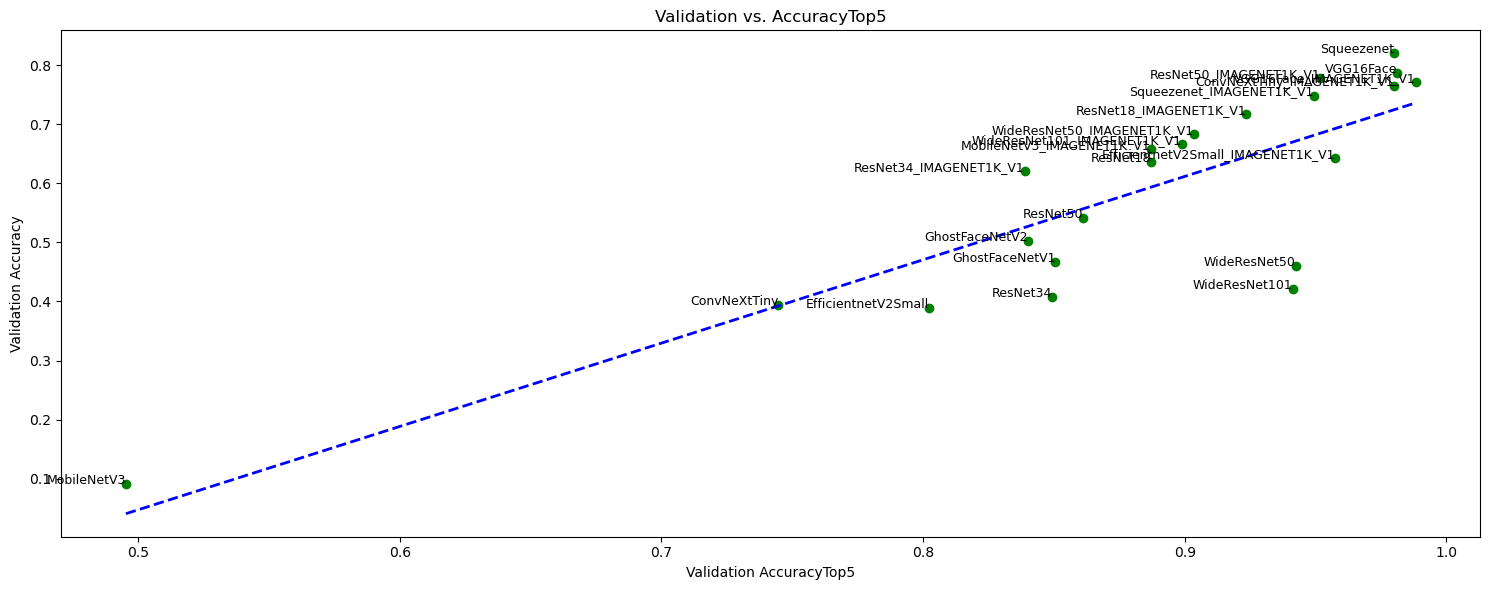

Correlation coefficient: 0.843


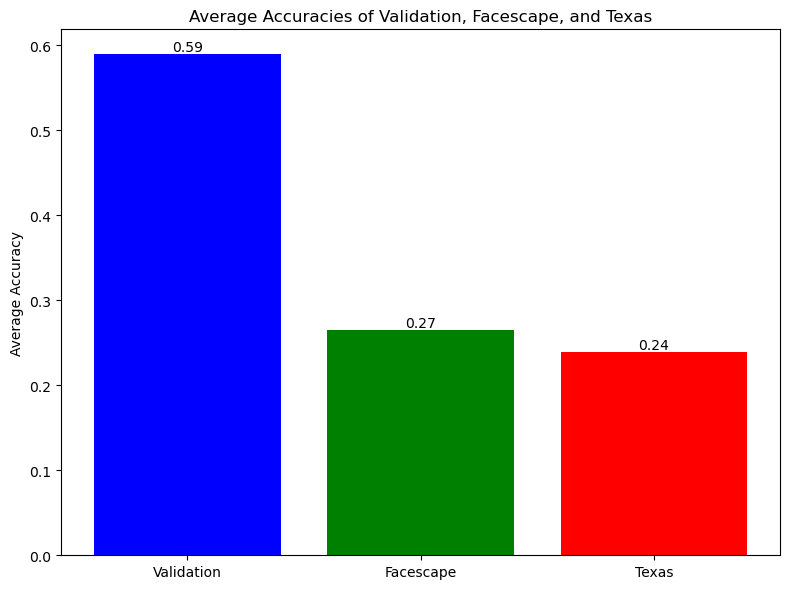

In [10]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP3:testmodels-RGB_11T_57V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8', 'rgb')

## EXP4:testmodels-DEPTH_11T_46V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8

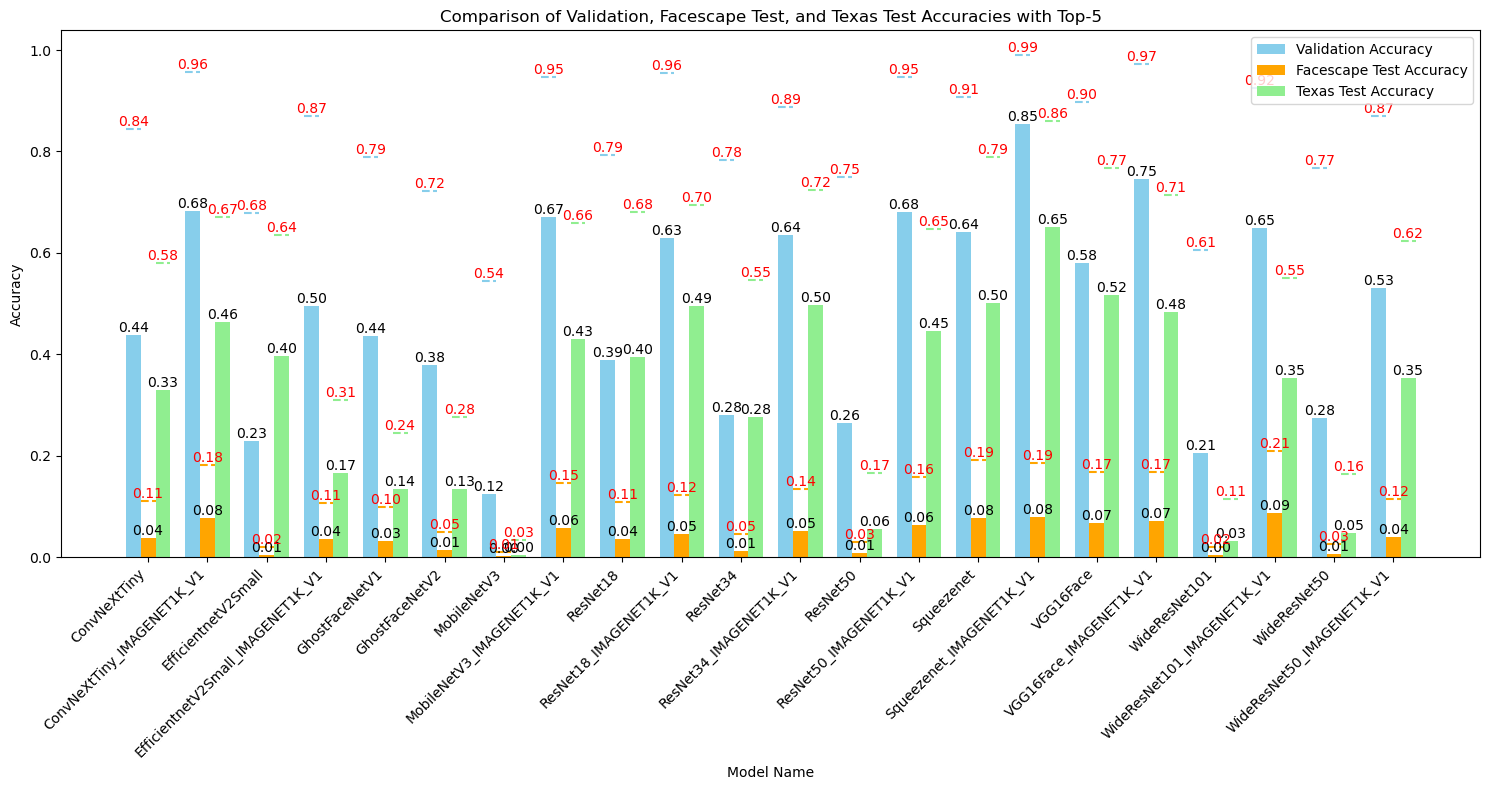

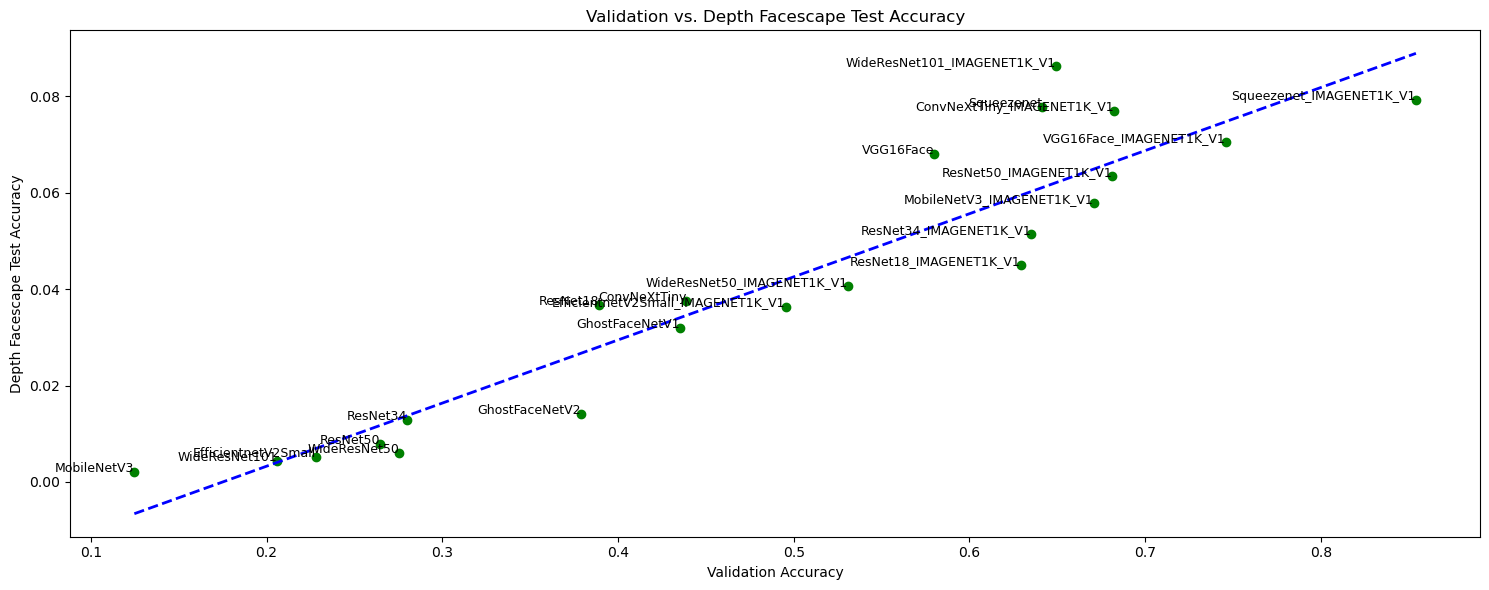

Correlation coefficient: 0.935


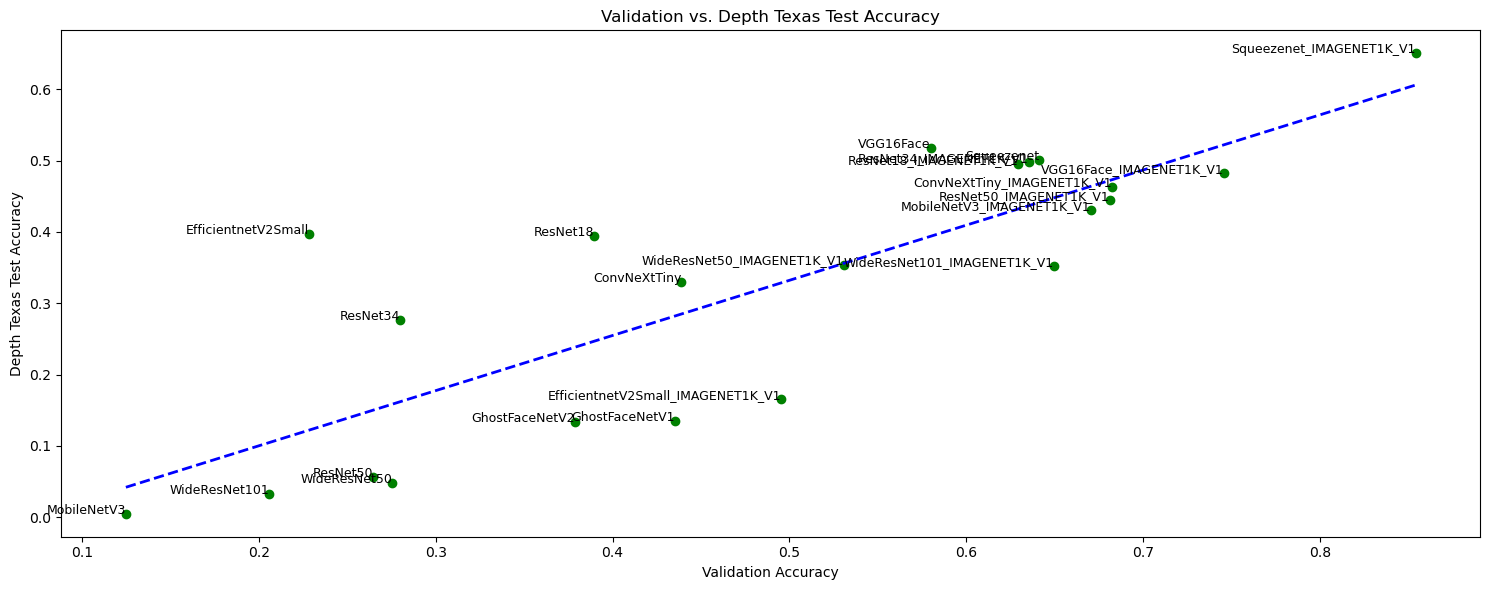

Correlation coefficient: 0.825


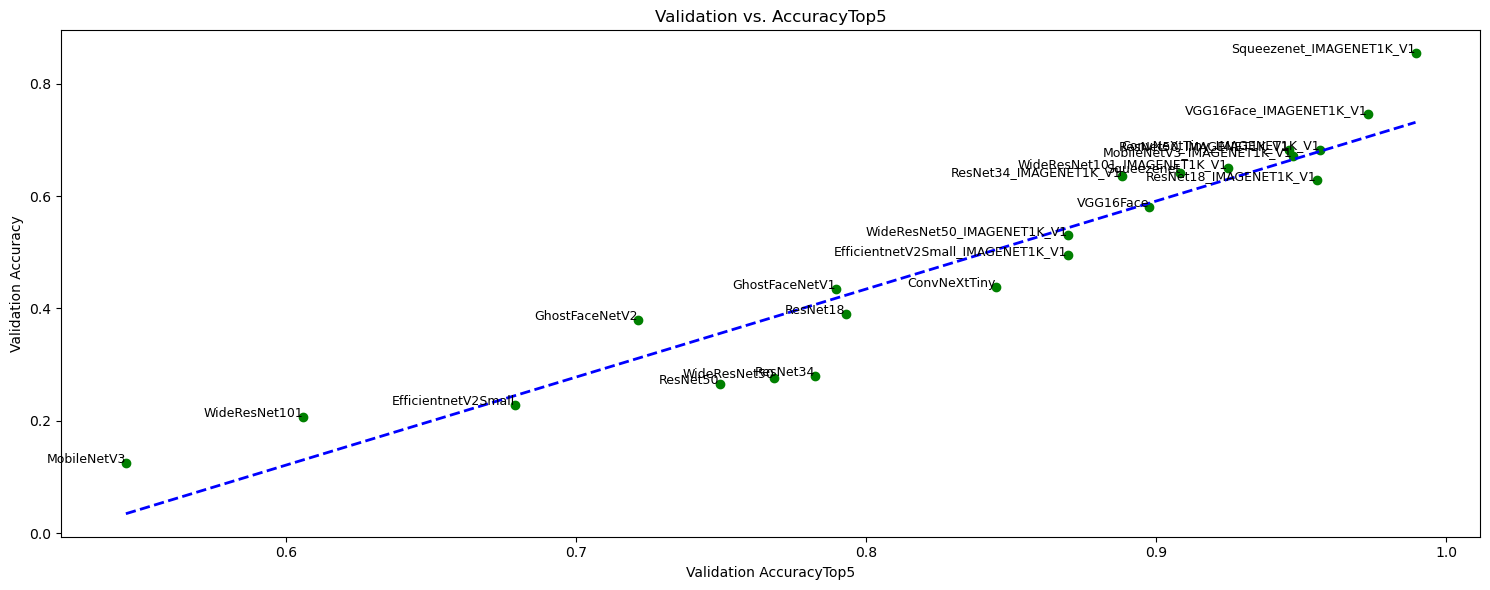

Correlation coefficient: 0.947


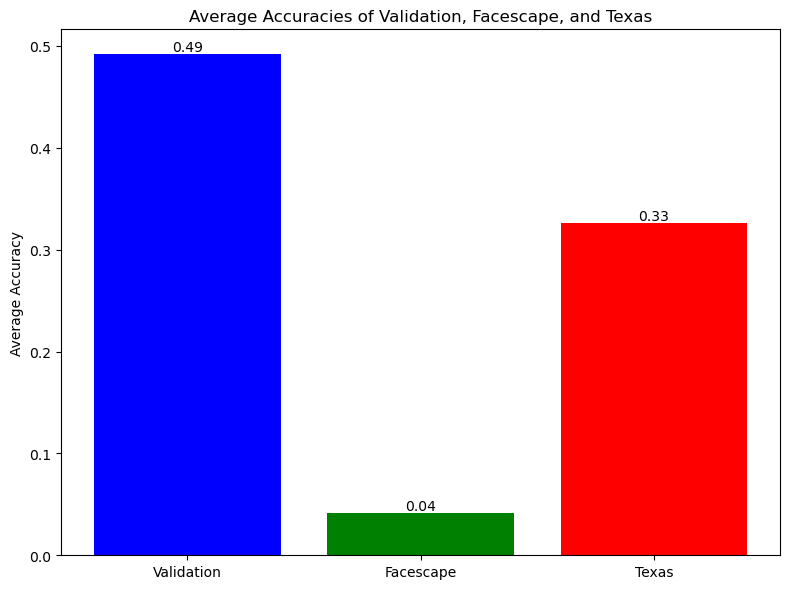

In [11]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP4:testmodels-DEPTH_11T_57V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8', 'depth')

## EXP5:testmodels-RGB_11T_46V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8-OptimizedTripletSampler

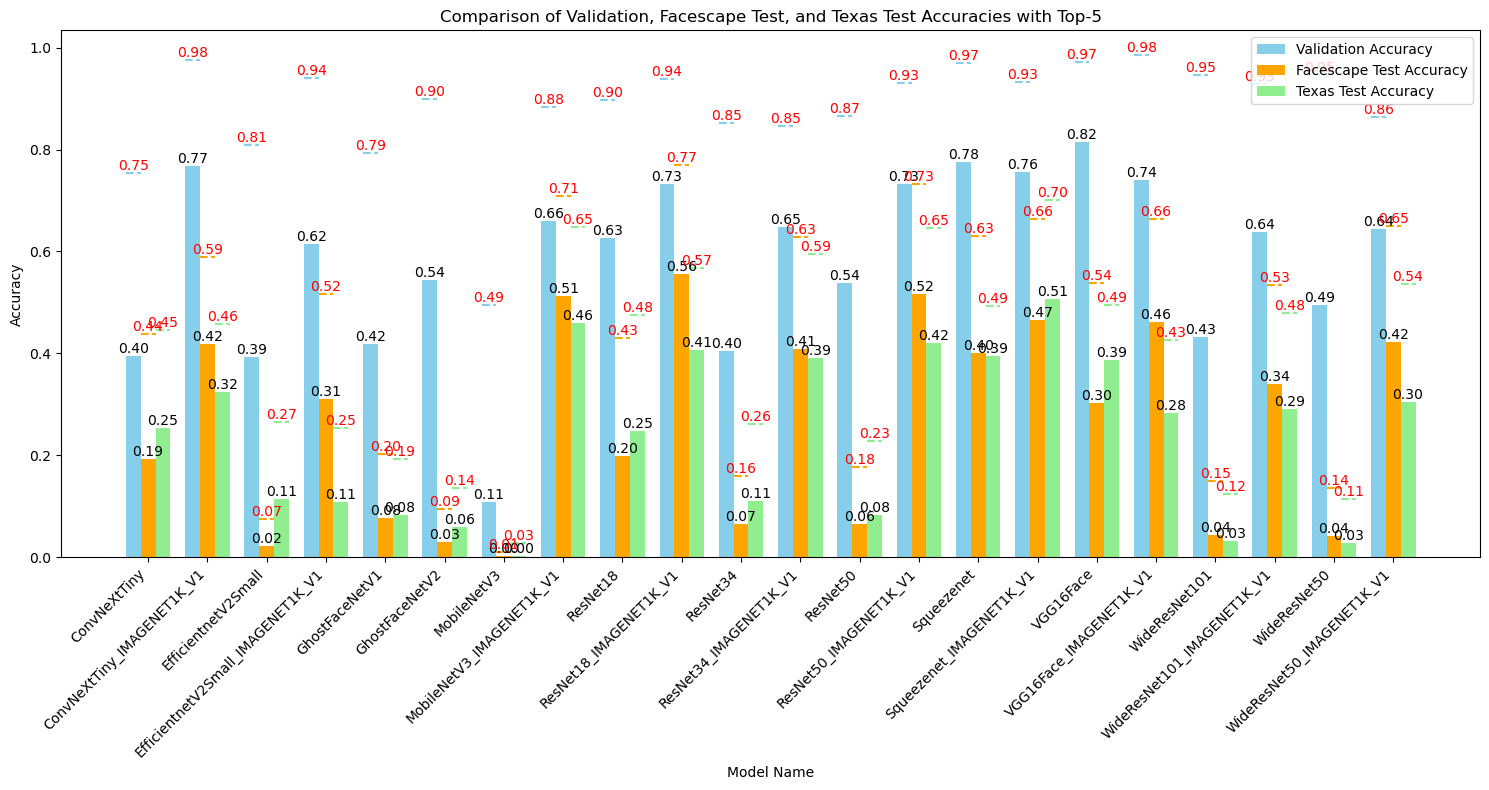

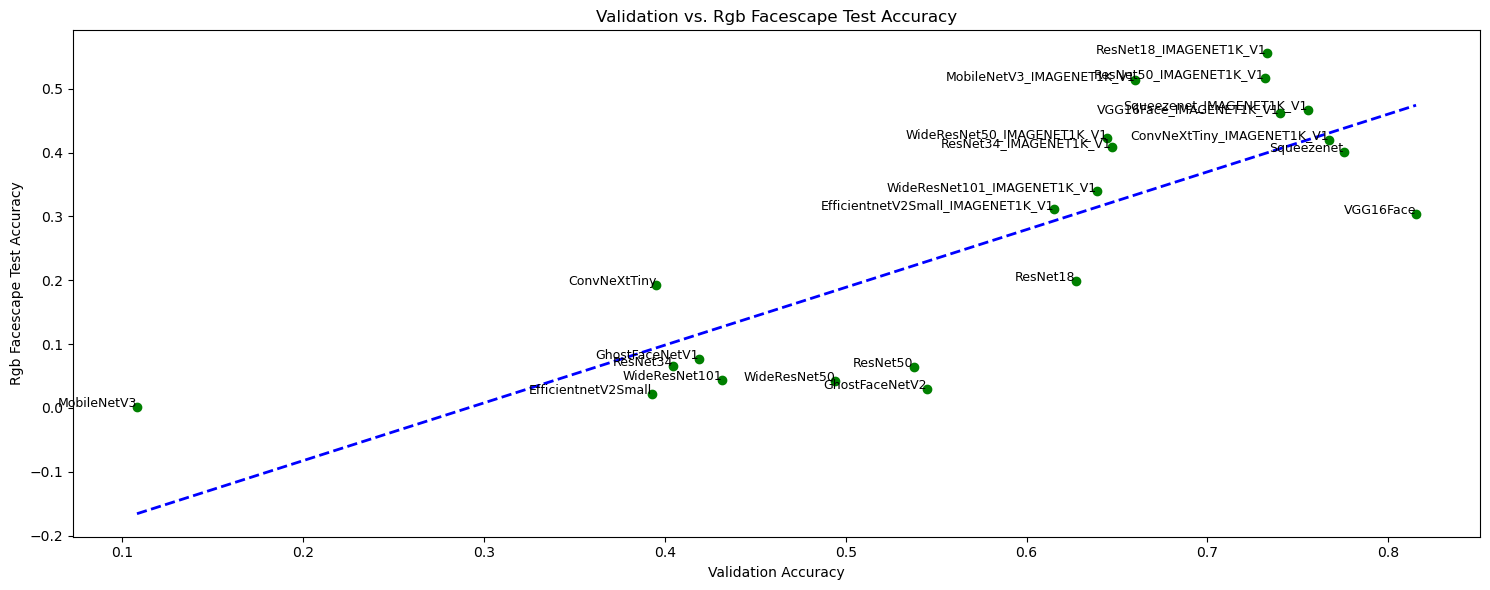

Correlation coefficient: 0.809


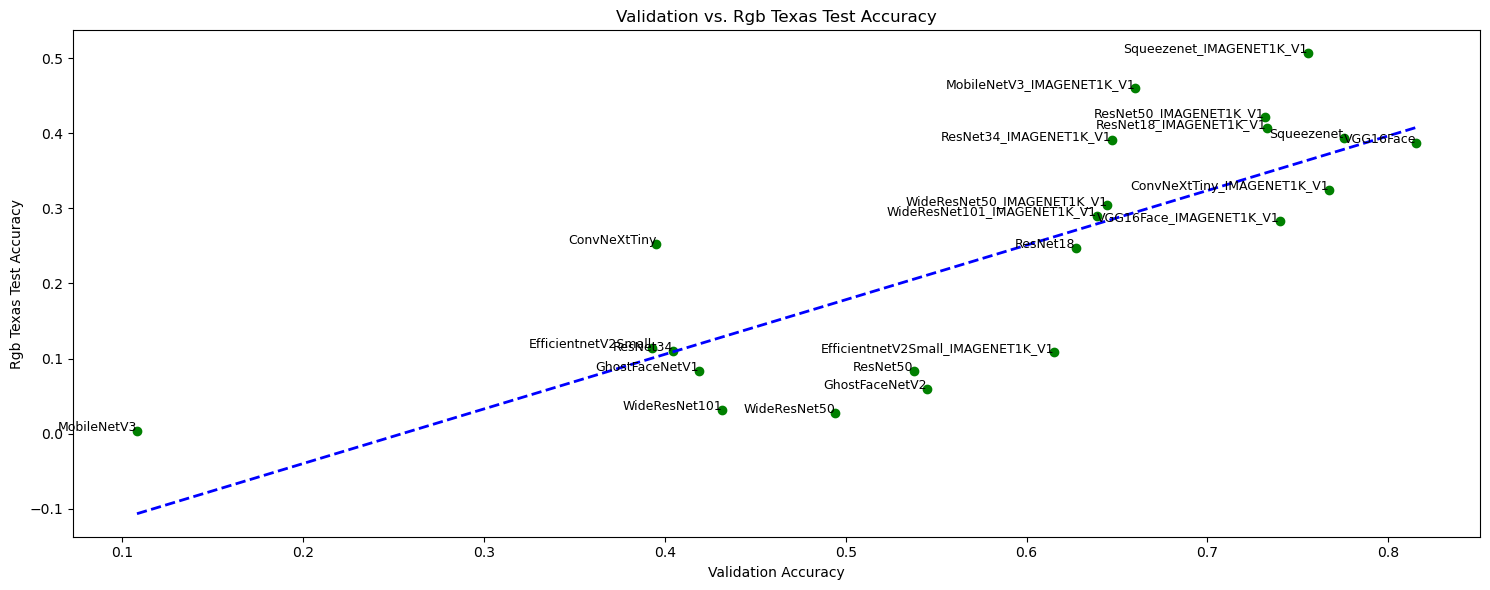

Correlation coefficient: 0.788


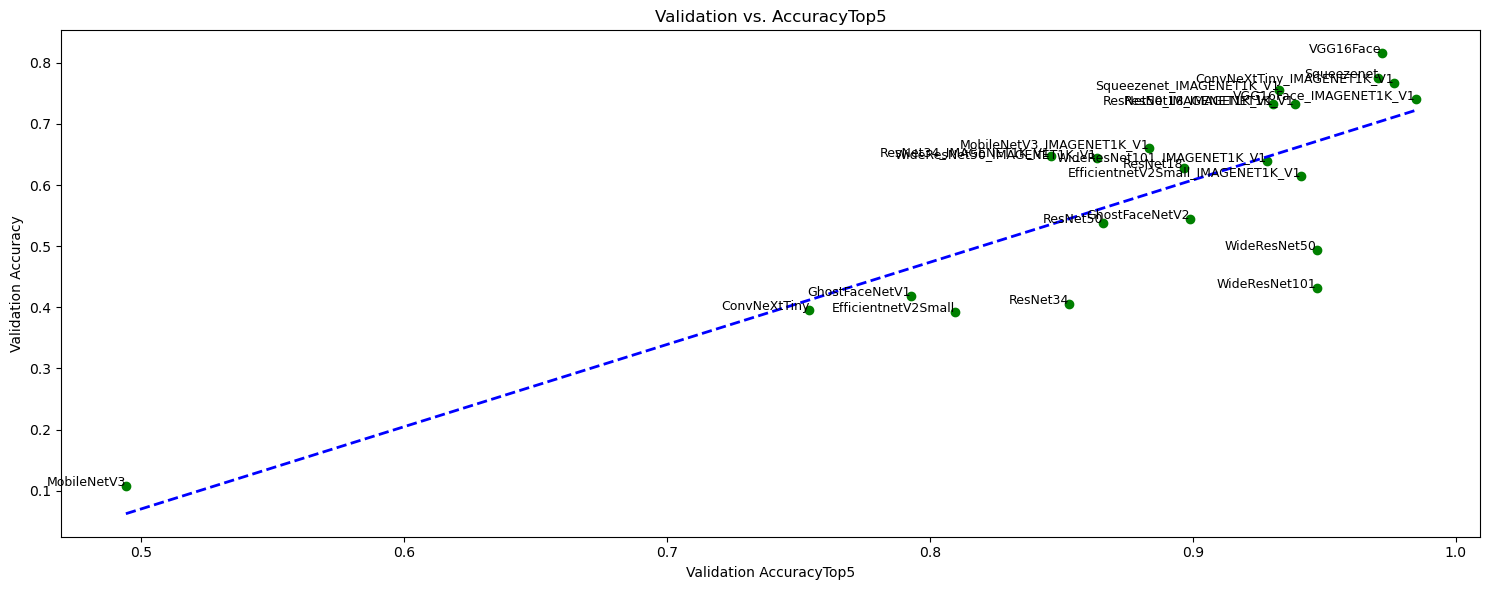

Correlation coefficient: 0.829


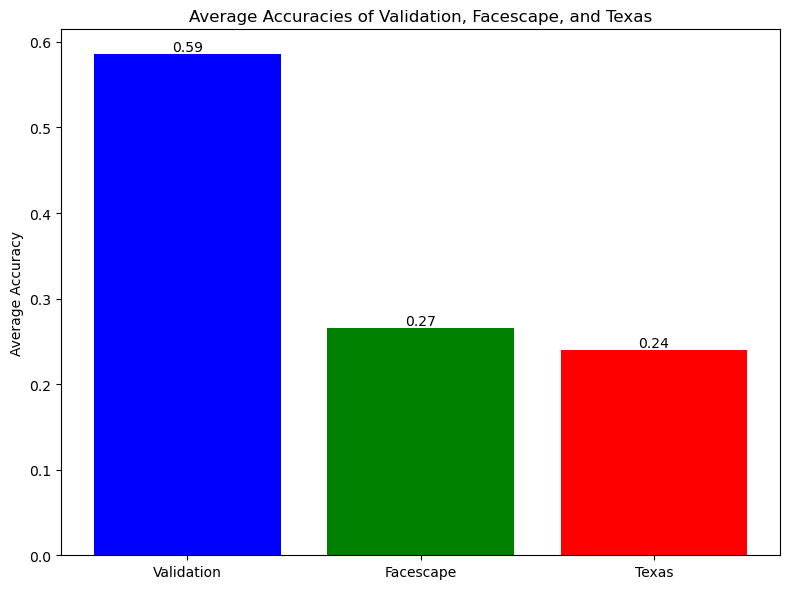

In [12]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP5:testmodels-RGB_11T_57V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8-OptimizedTripletSampler', 'rgb')

## EXP6:testmodels-DEPTH_11T_46V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8-OptimizedTripletSampler

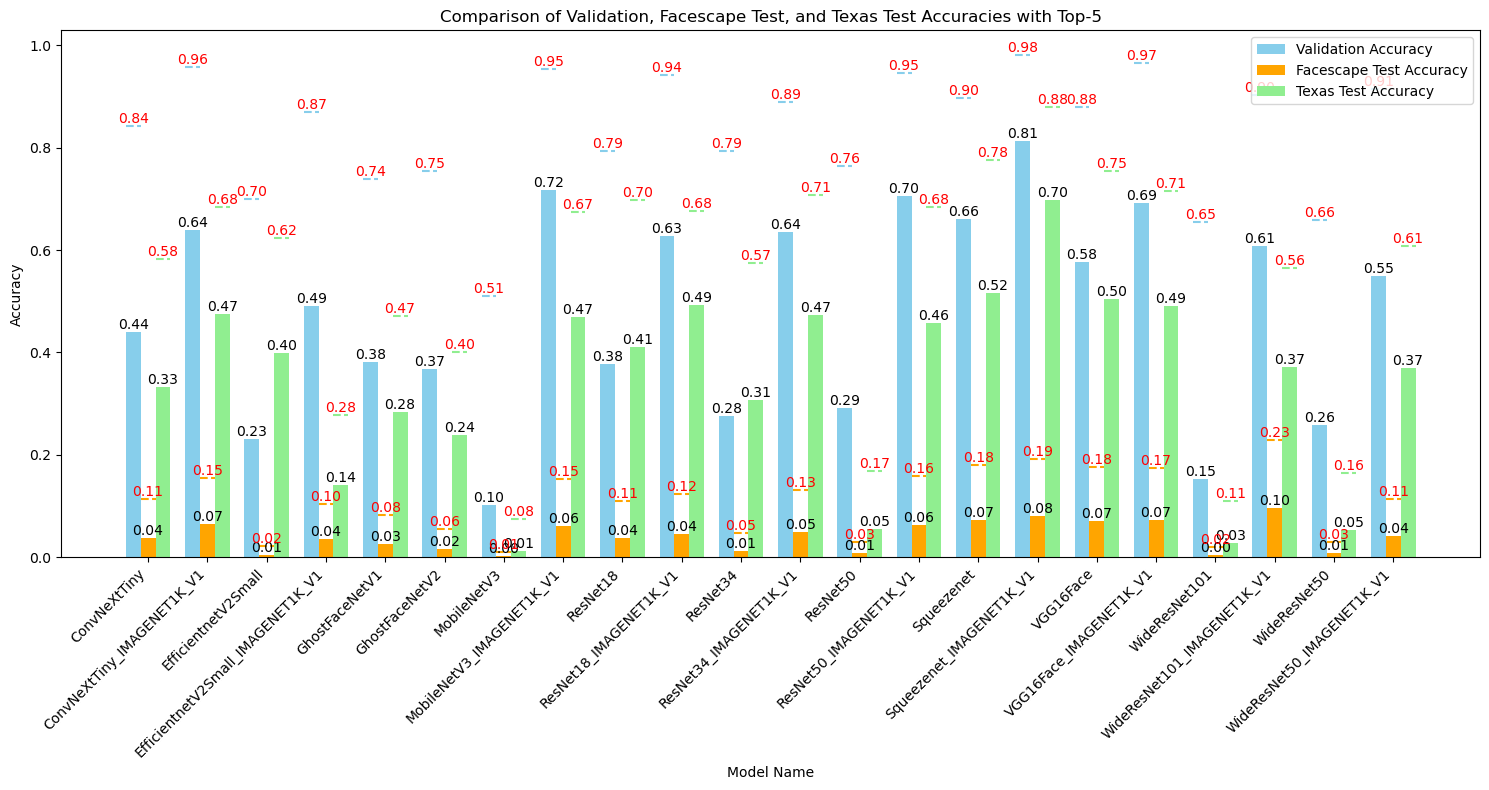

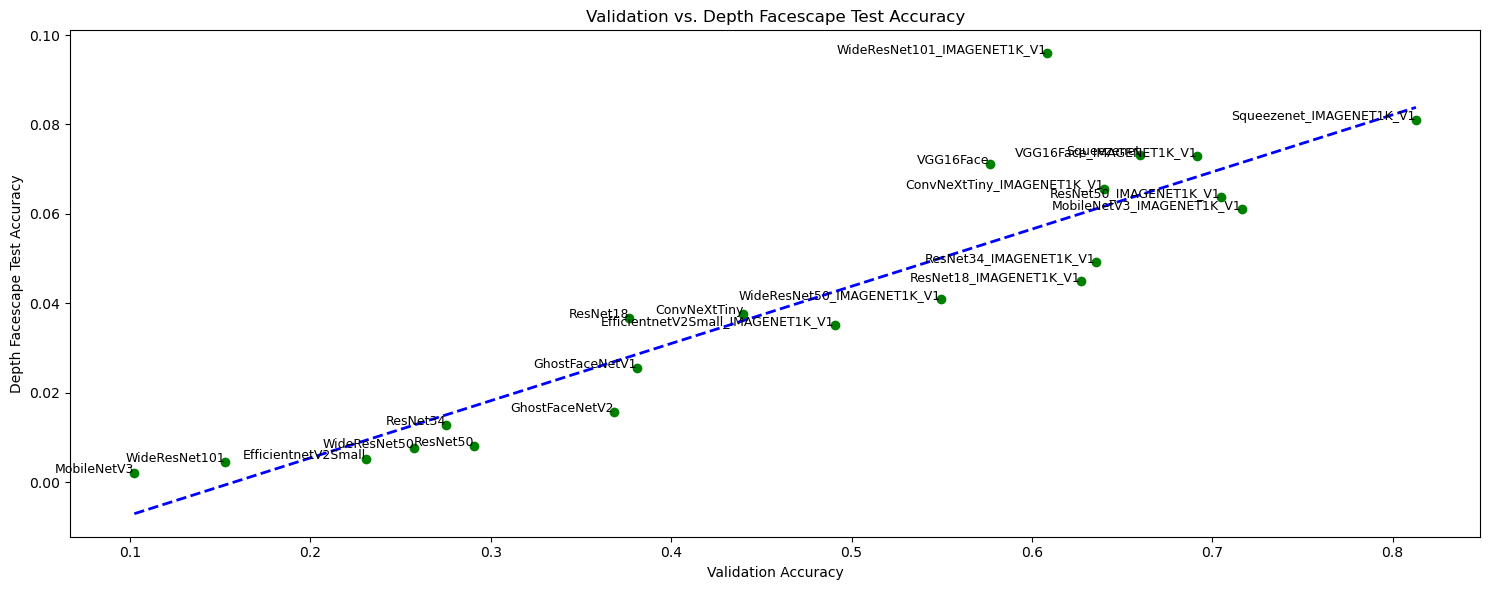

Correlation coefficient: 0.909


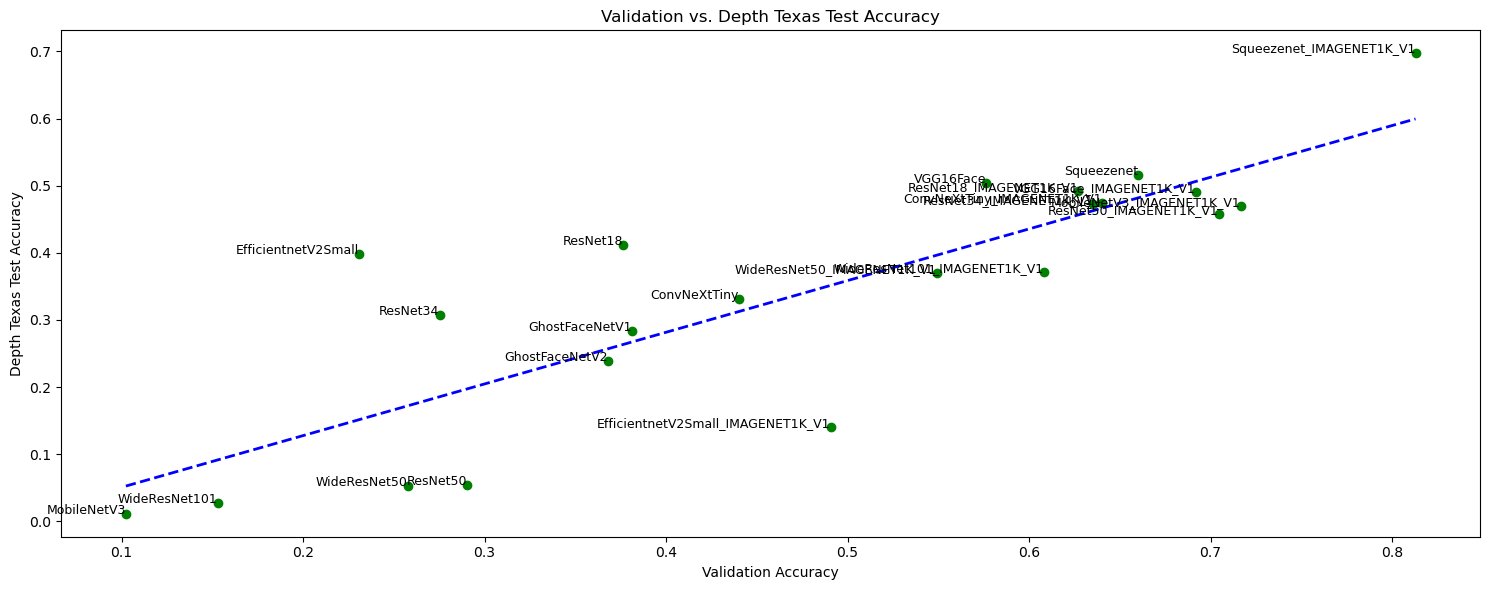

Correlation coefficient: 0.839


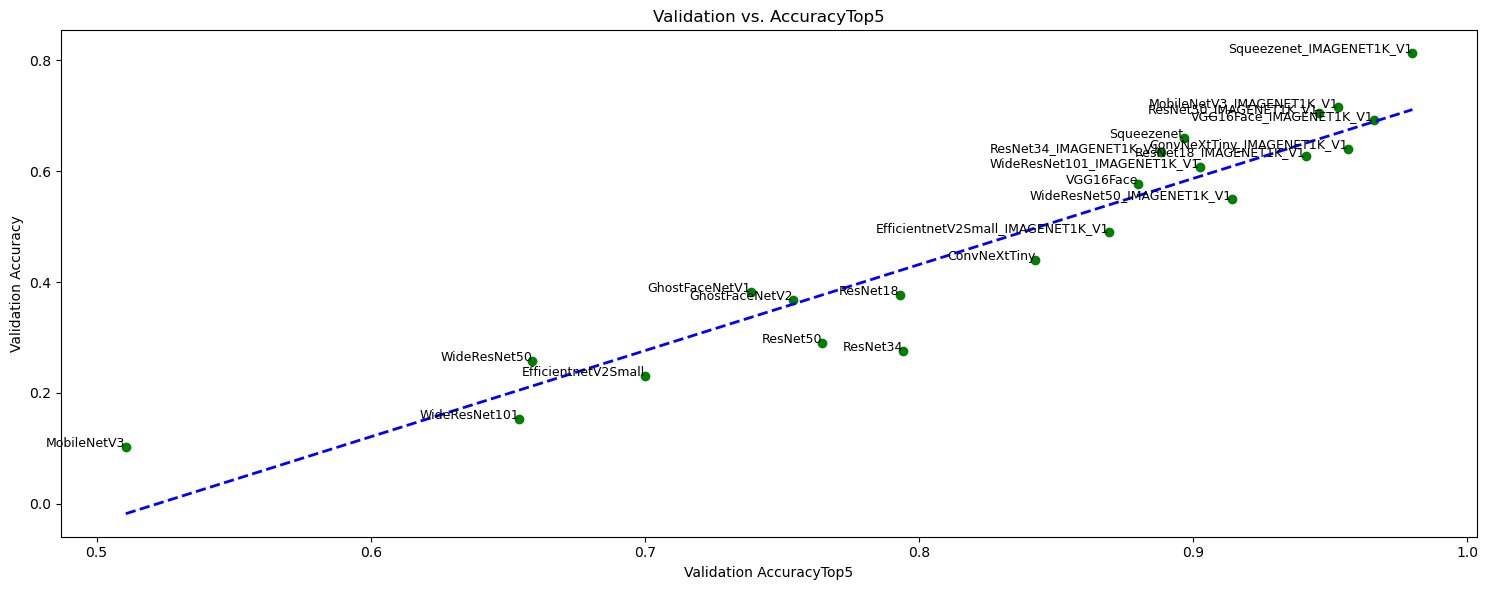

Correlation coefficient: 0.946


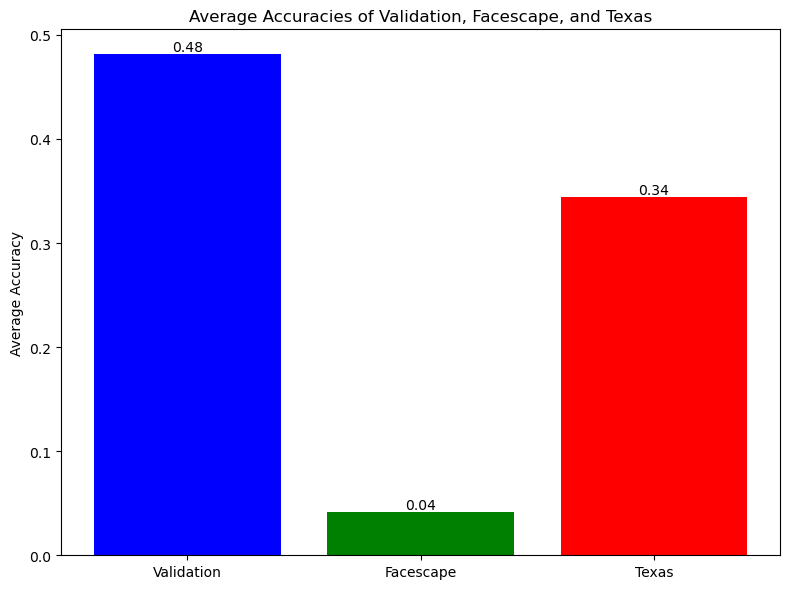

In [13]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP6:testmodels-DEPTH_11T_57V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8-OptimizedTripletSampler', 'depth')

## EXP7:testmodels-Photos_11T_46V_SingleTrainSample-enc128-BigHead-TripletLoss-BATCHSIZE8

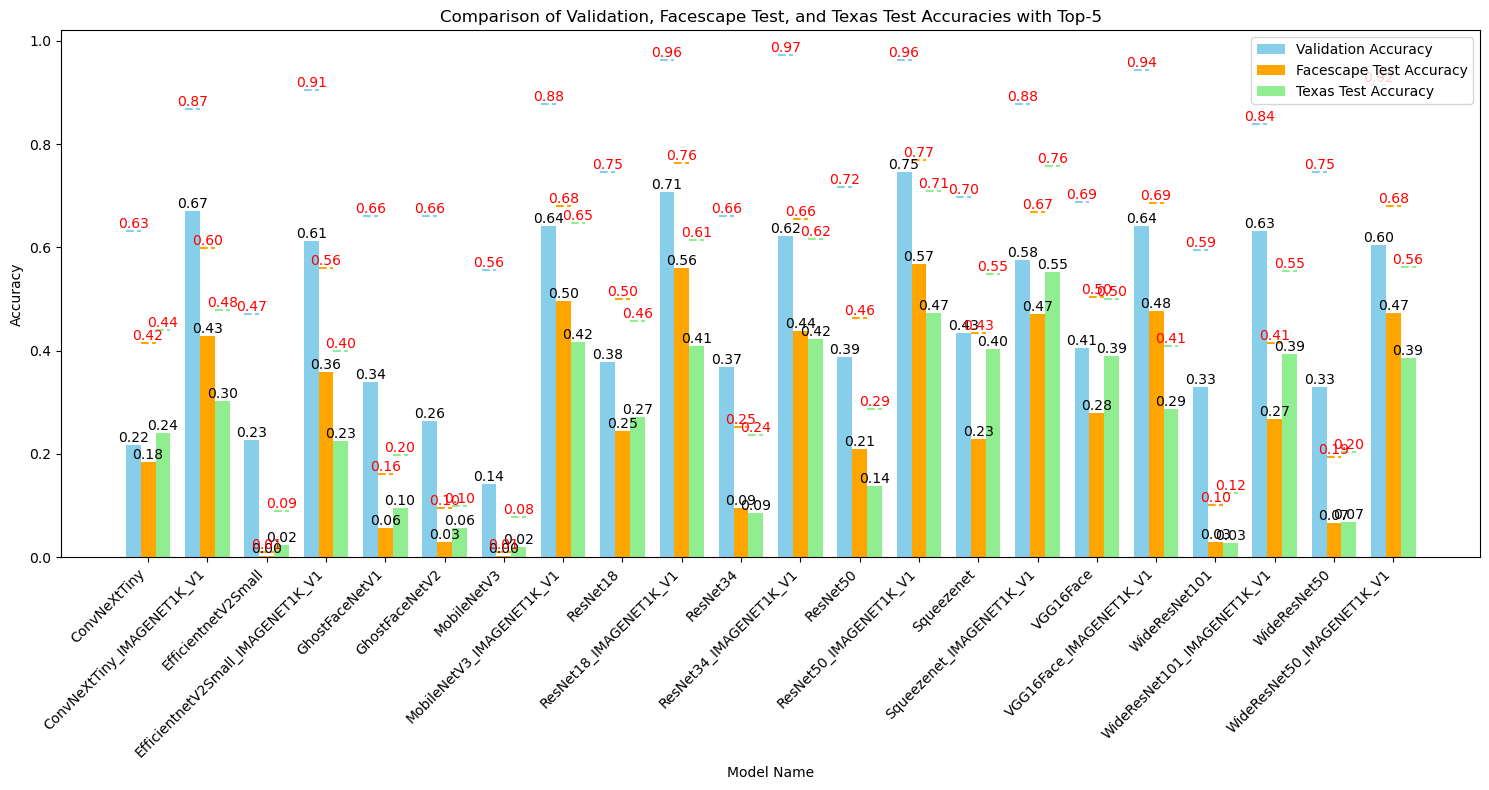

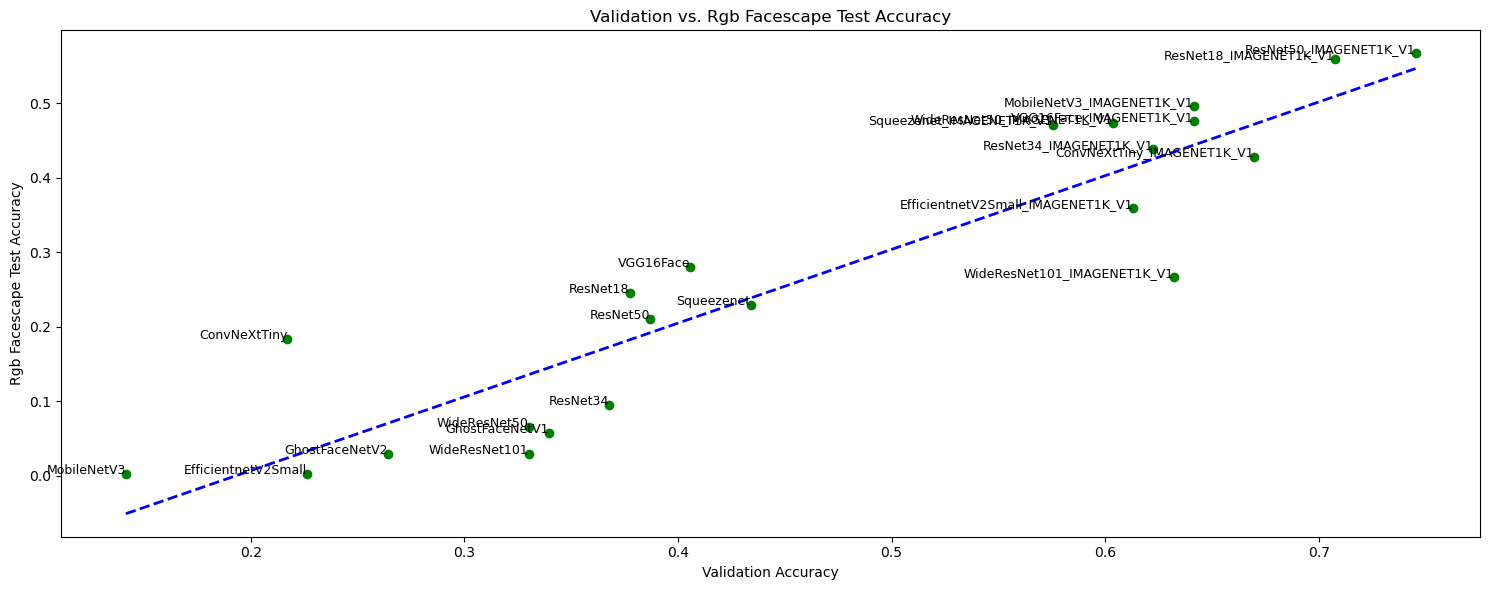

Correlation coefficient: 0.920


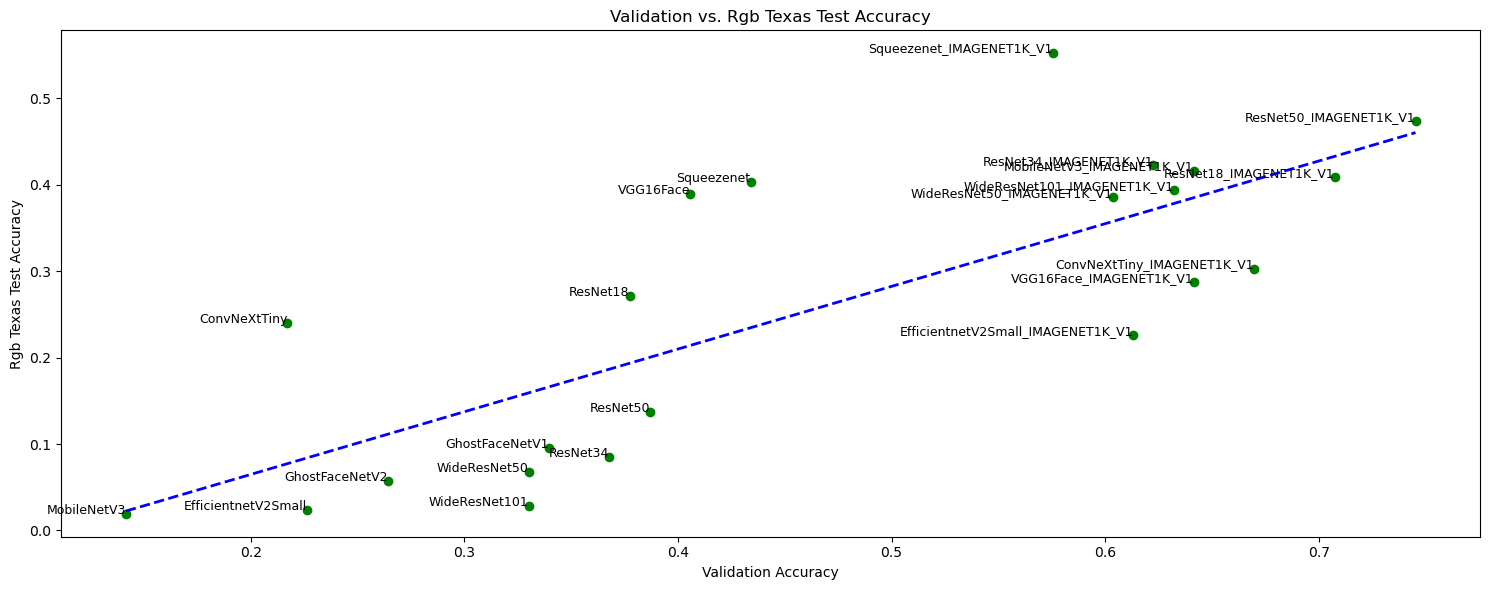

Correlation coefficient: 0.780


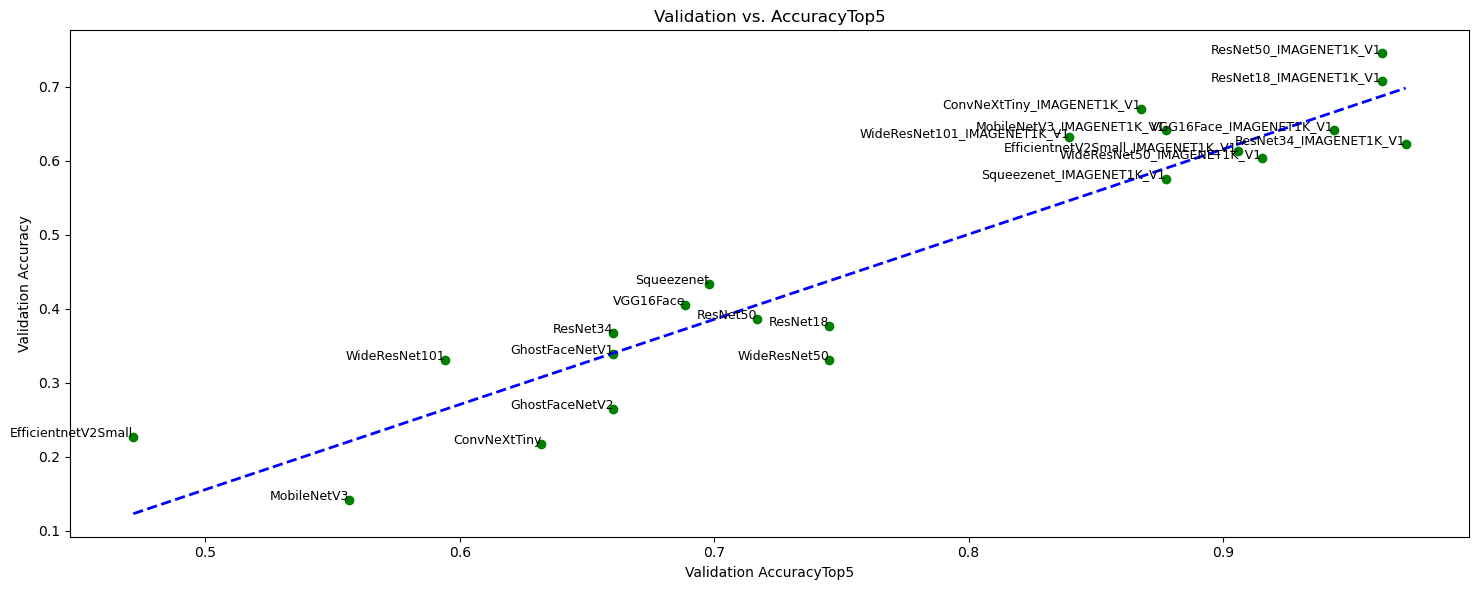

Correlation coefficient: 0.937


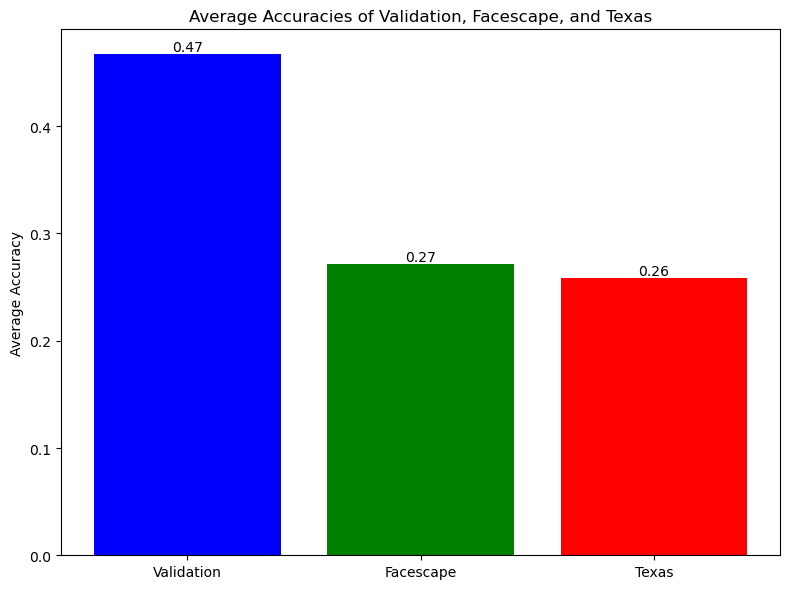

In [14]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP7:testmodels-Photos_11T_57V_SingleTrainSample-enc128-BigHead-TripletLoss-BATCHSIZE8', 'rgb')

## EXP8:testmodels-Photos_11T_46V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8

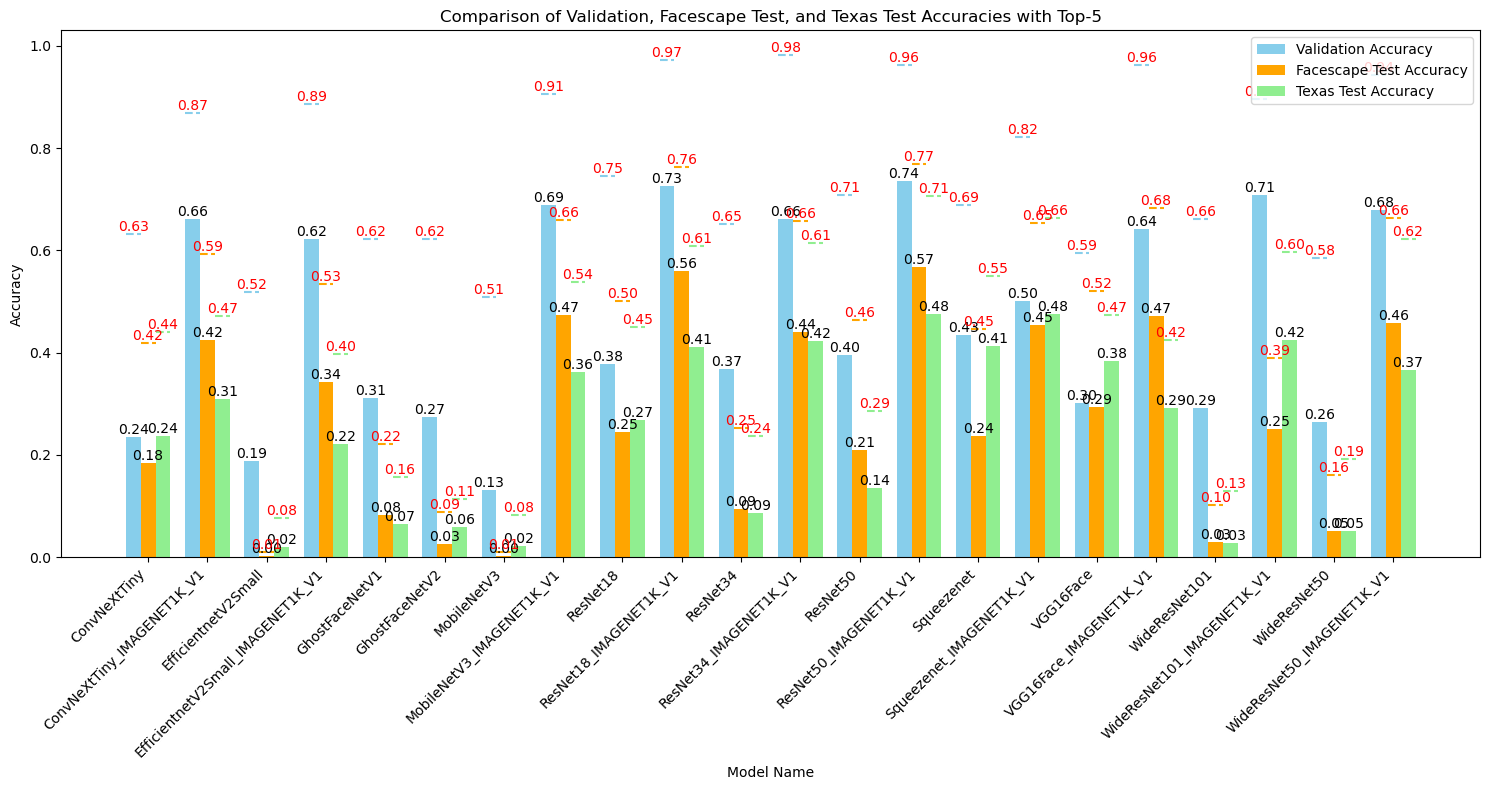

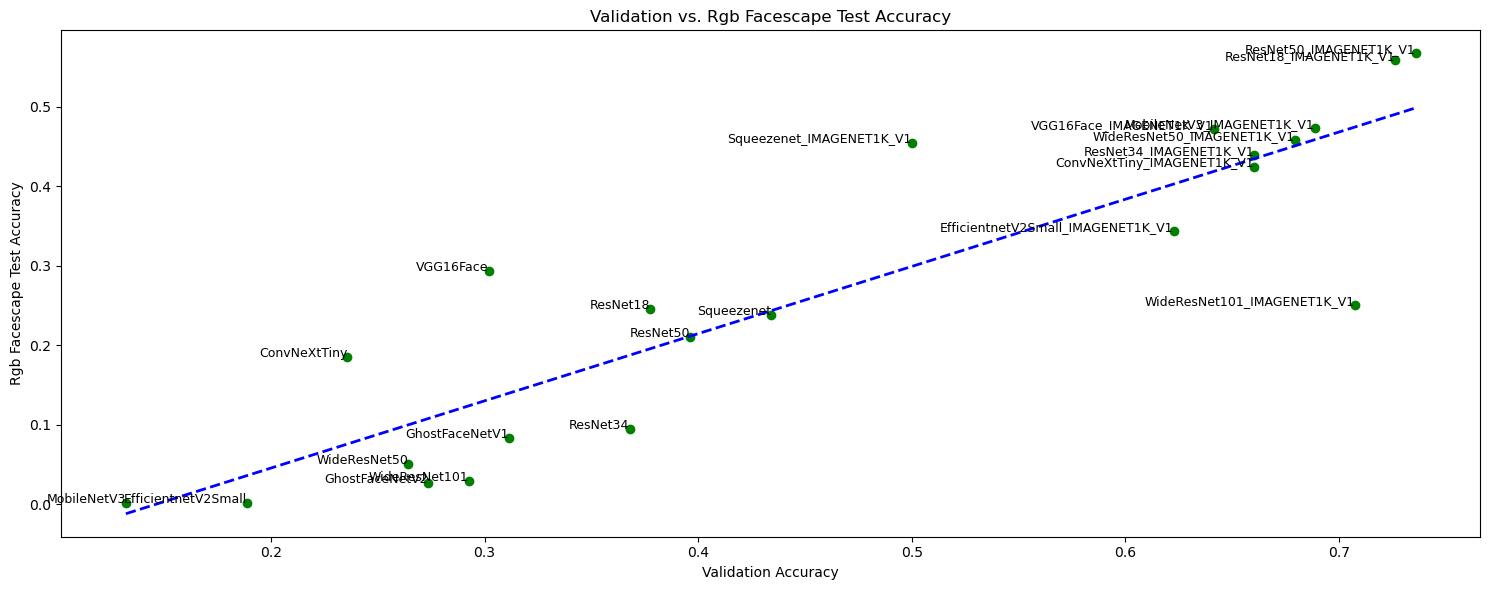

Correlation coefficient: 0.888


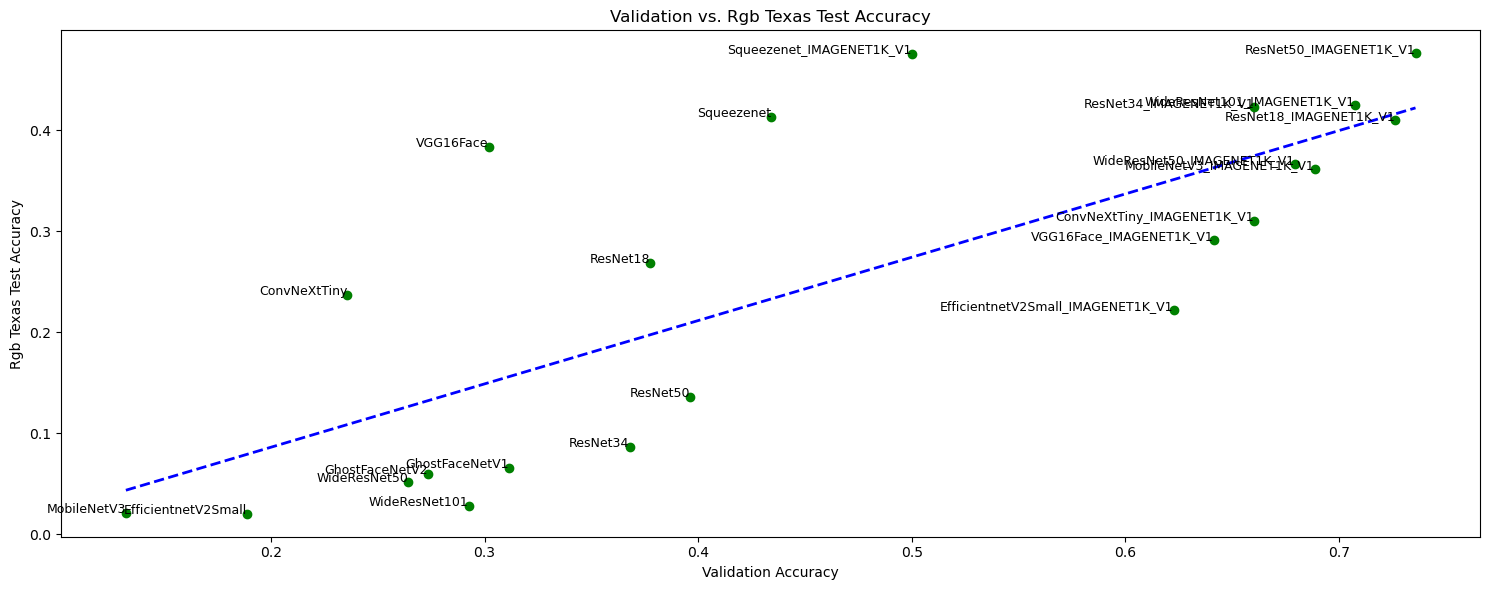

Correlation coefficient: 0.766


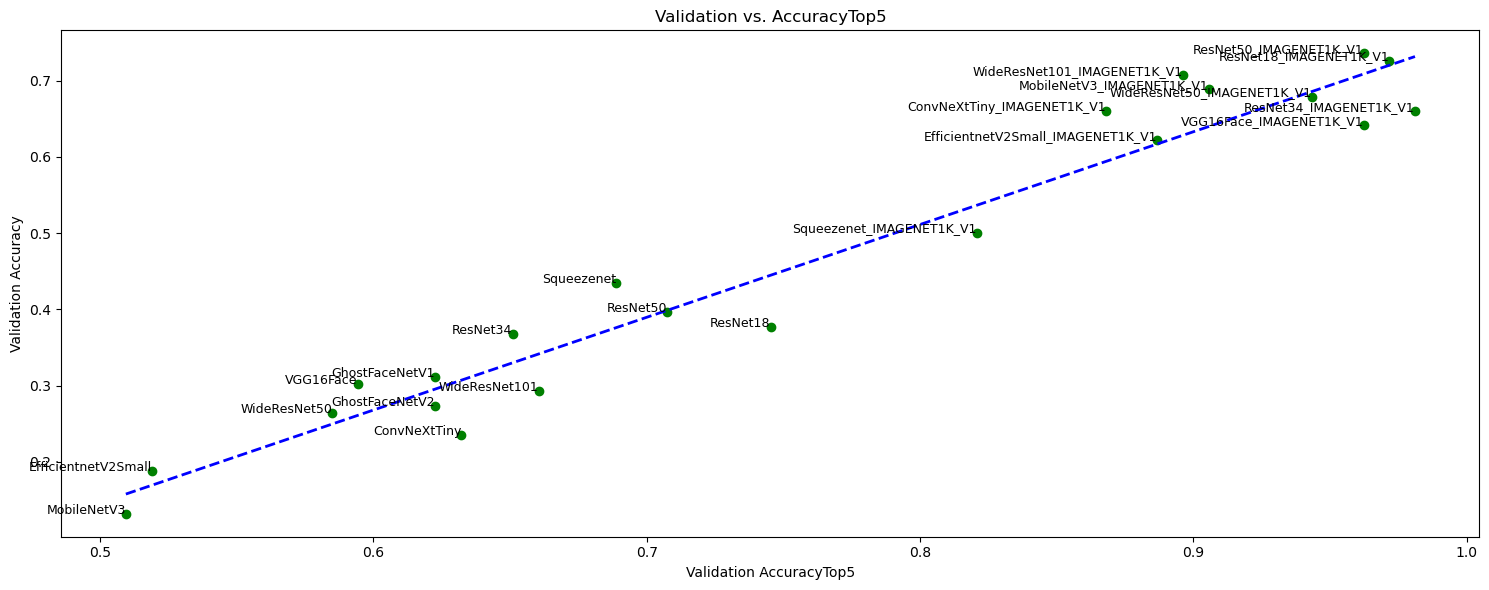

Correlation coefficient: 0.973


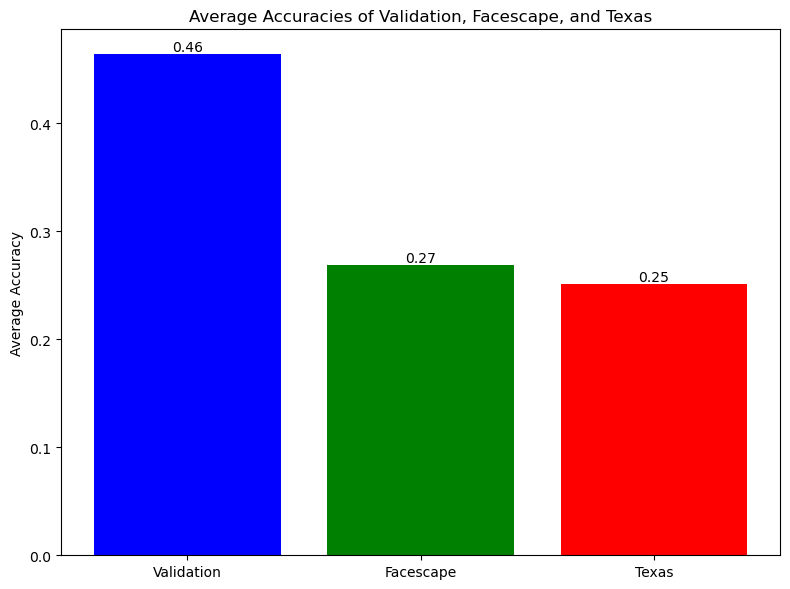

In [15]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP8:testmodels-Photos_11T_57V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8', 'rgb')

## EXP9:RGB_15T_51V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8

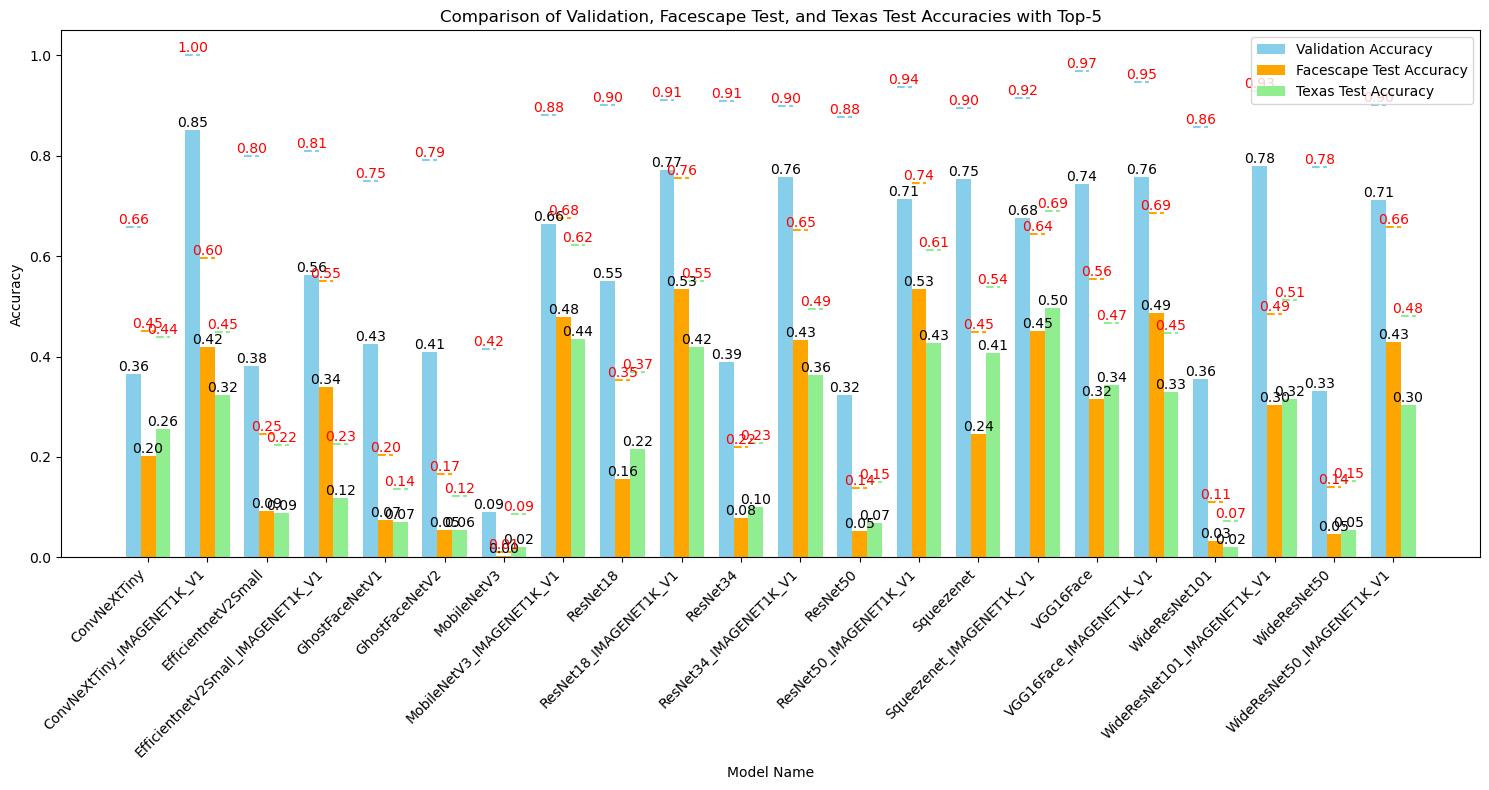

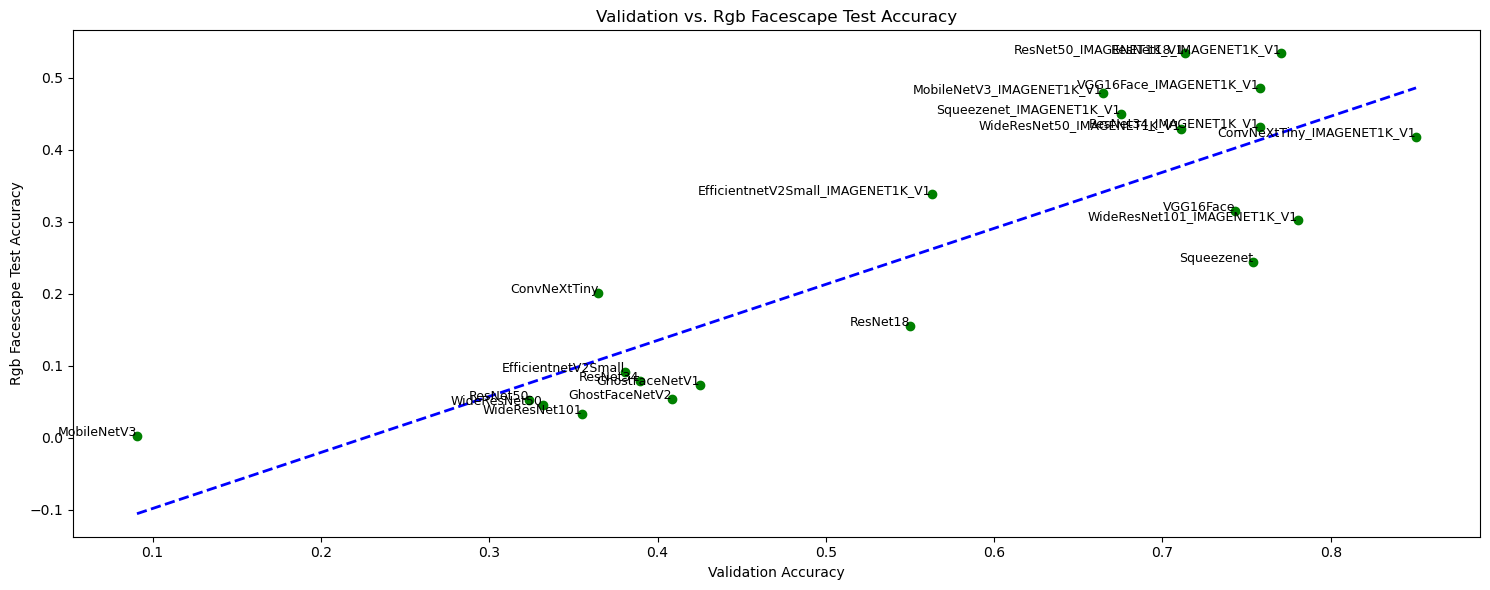

Correlation coefficient: 0.863


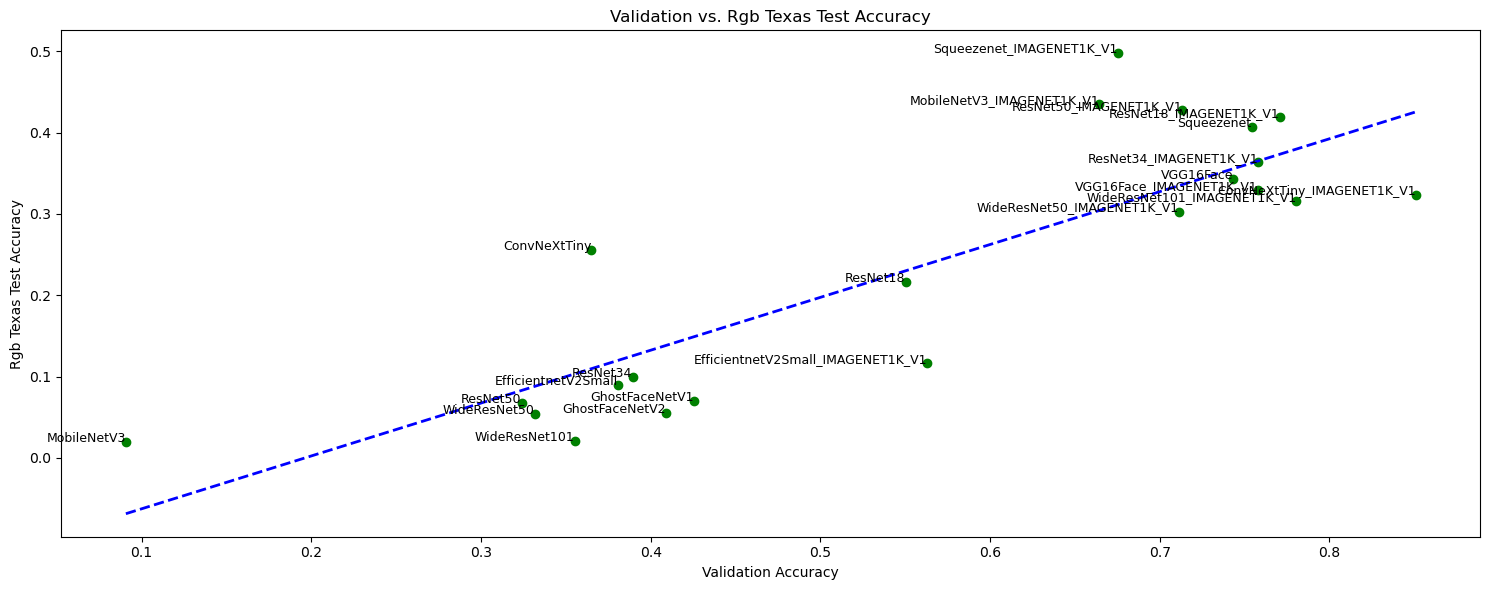

Correlation coefficient: 0.849


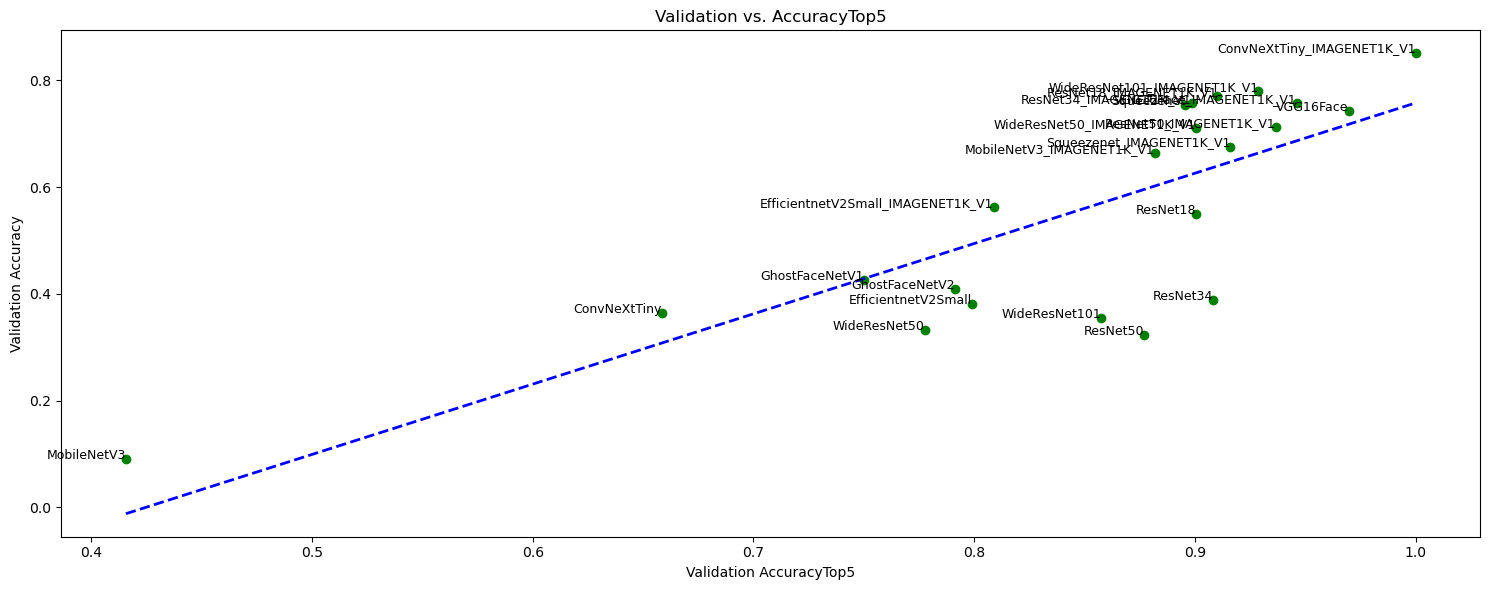

Correlation coefficient: 0.795


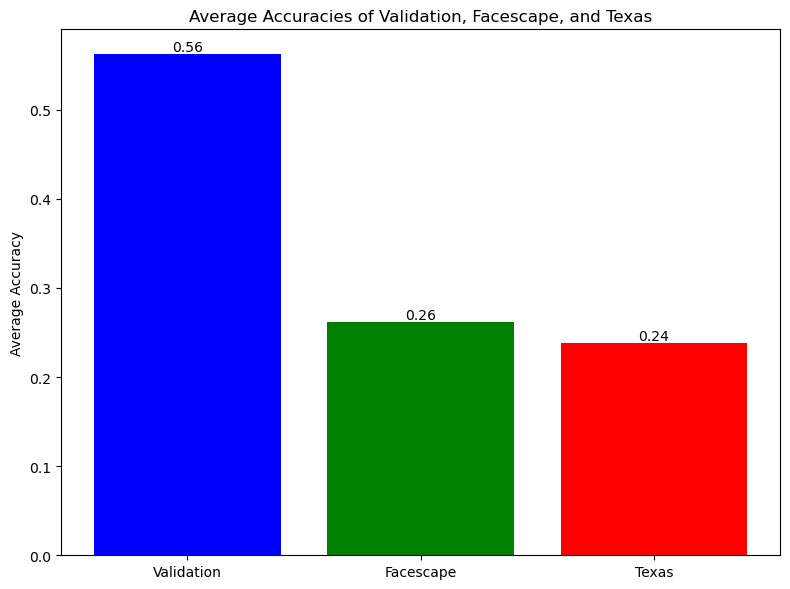

In [16]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP9:RGB_15T_51V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8', 'rgb')

## EXP10:Depth_15T_51V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8

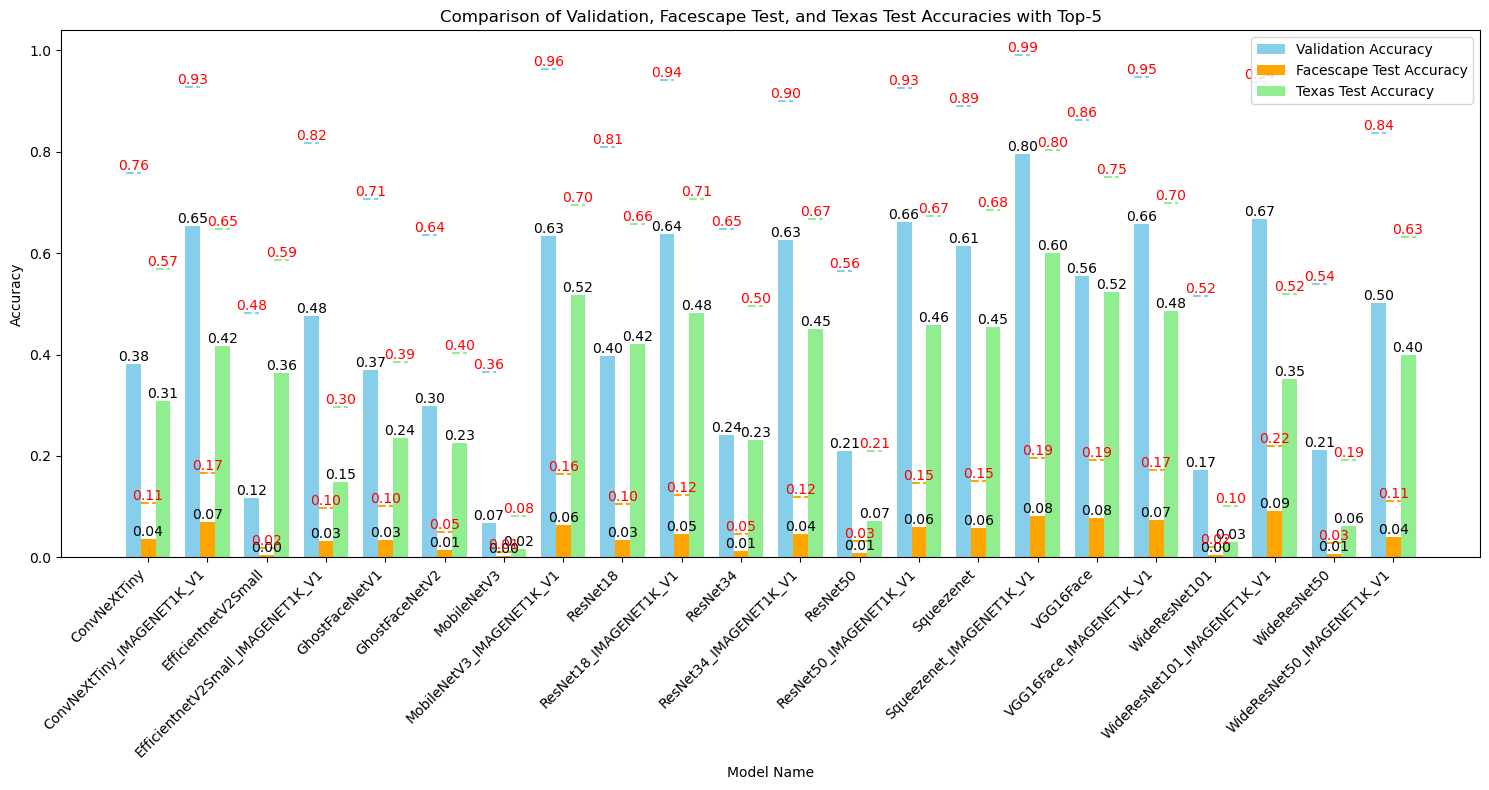

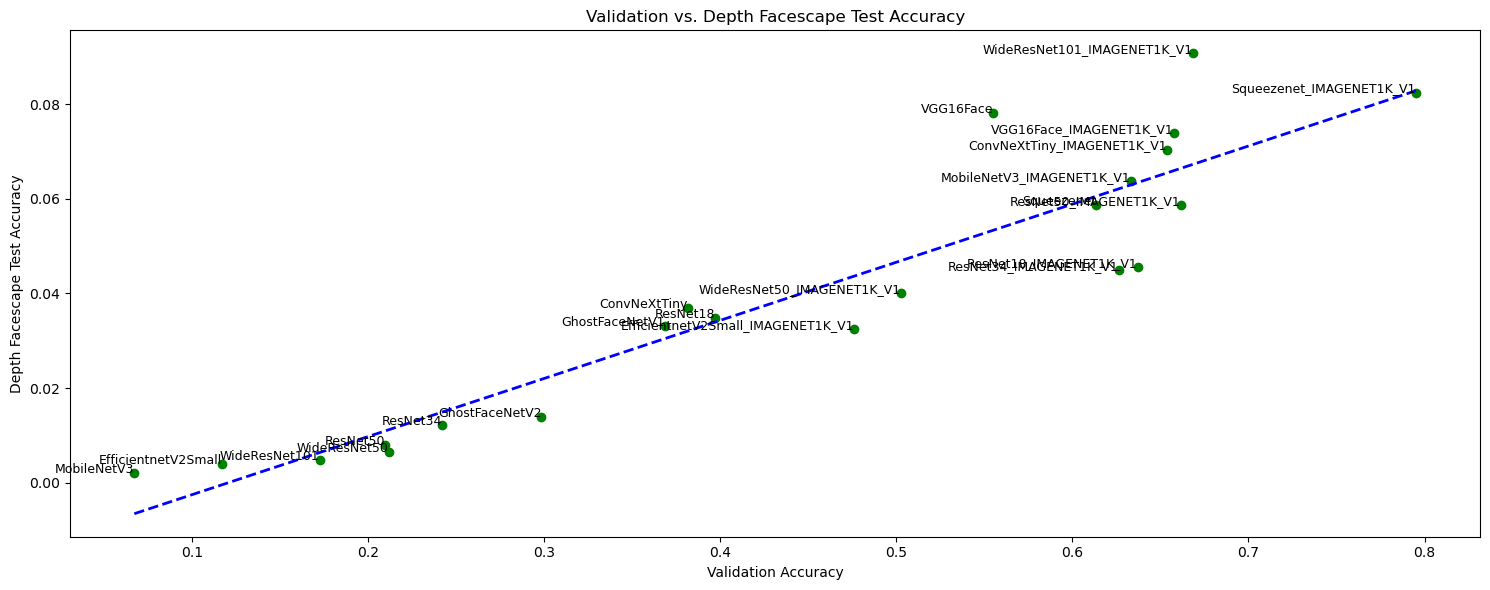

Correlation coefficient: 0.929


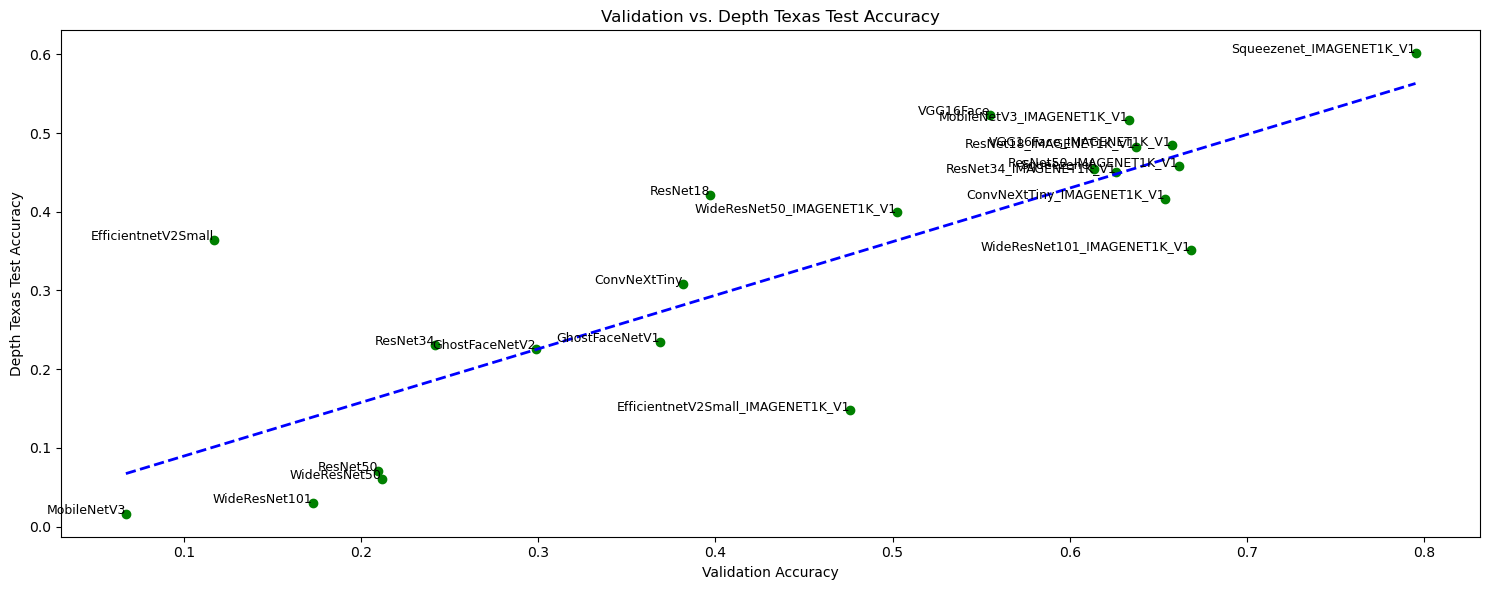

Correlation coefficient: 0.828


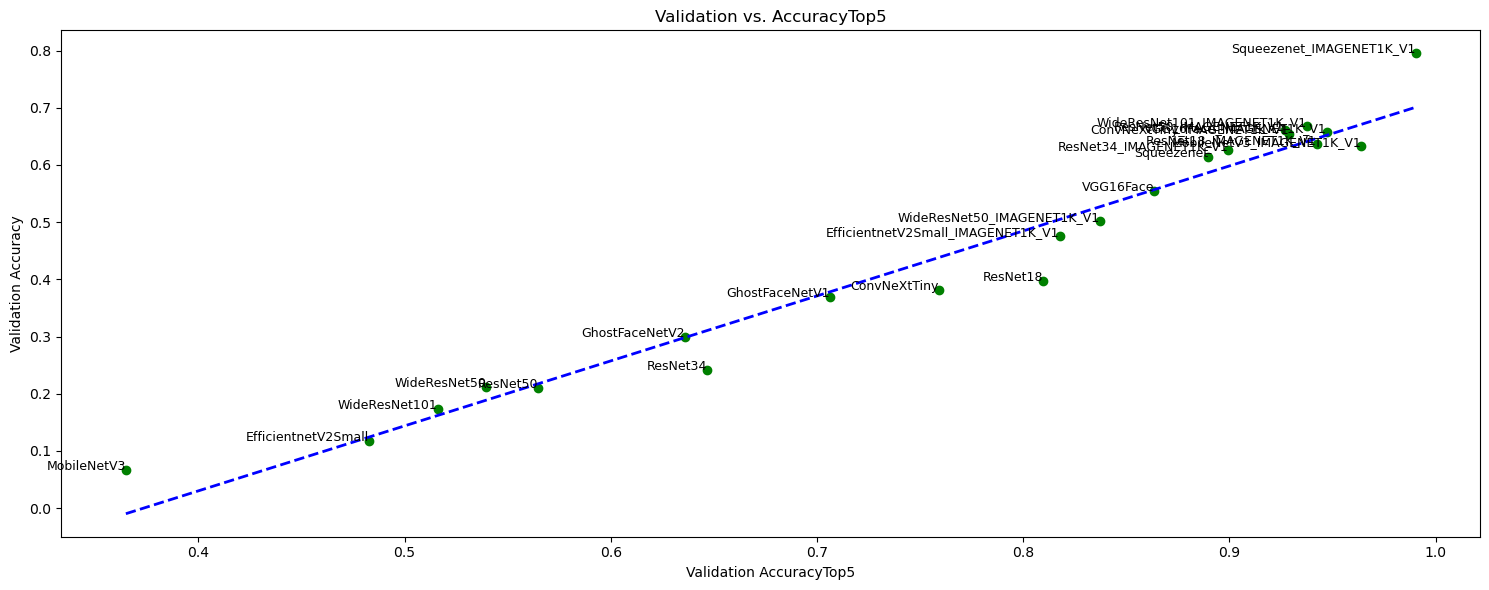

Correlation coefficient: 0.979


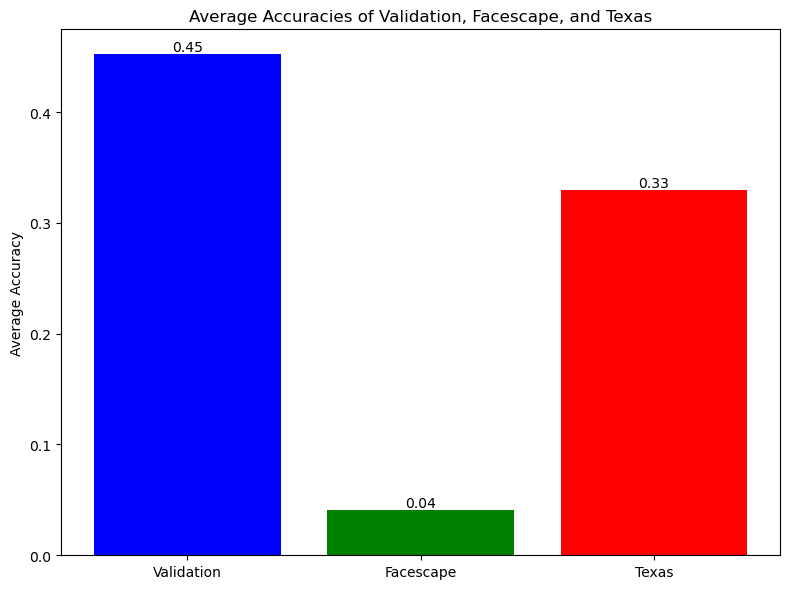

In [17]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP10:DEPTH_15T_51V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8', 'depth')

## EXP11:RGB_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8

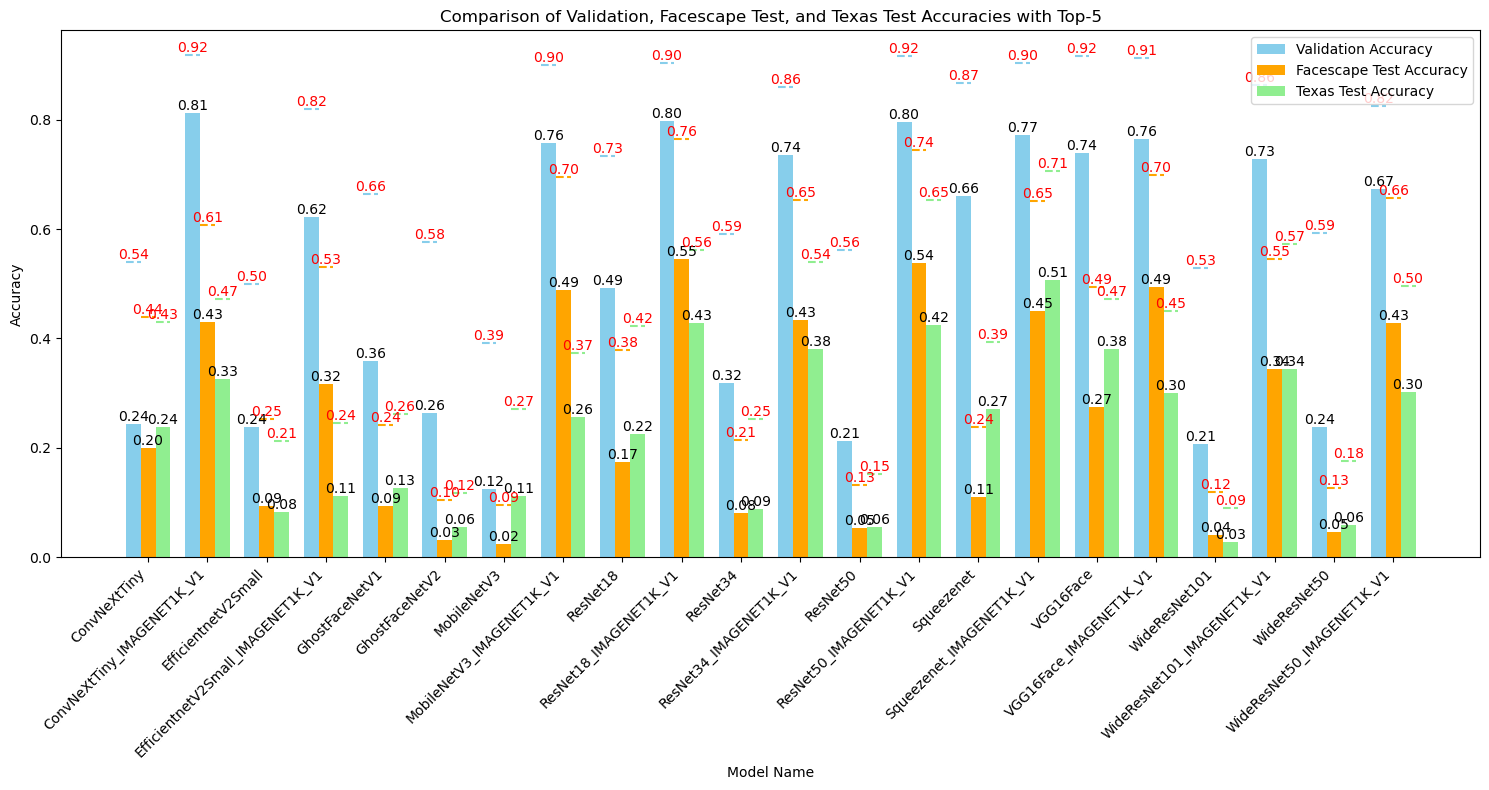

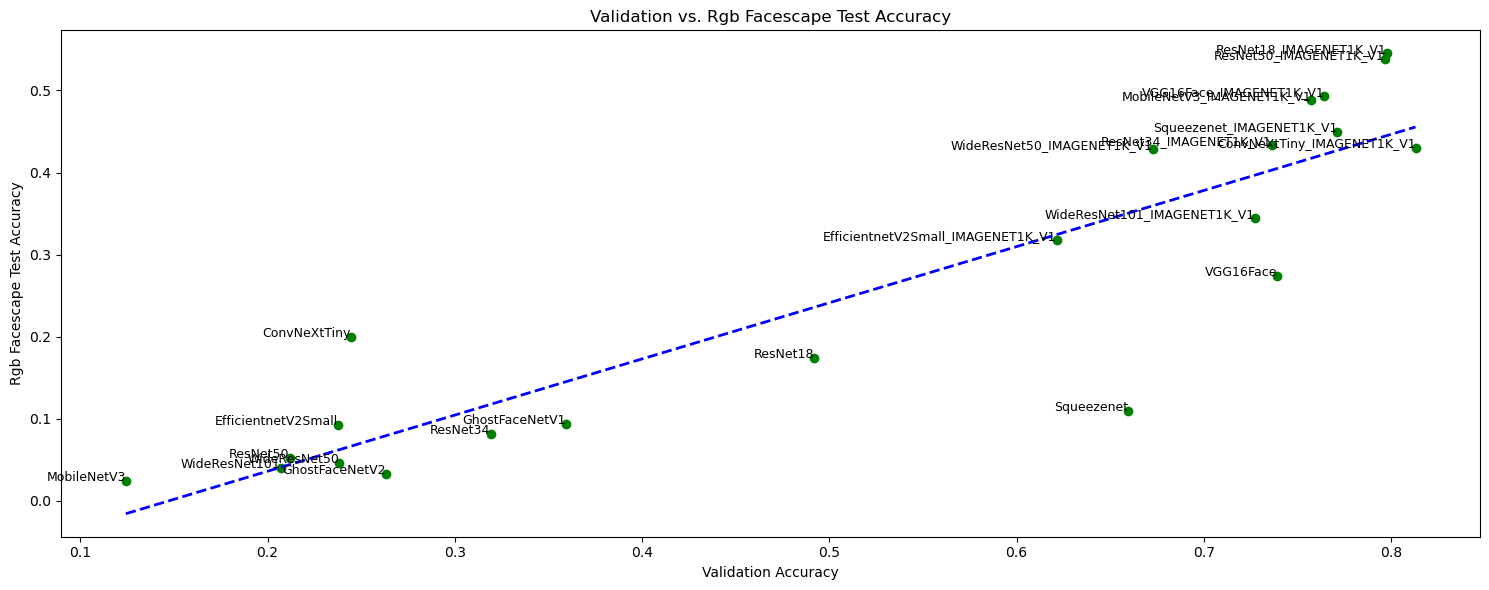

Correlation coefficient: 0.901


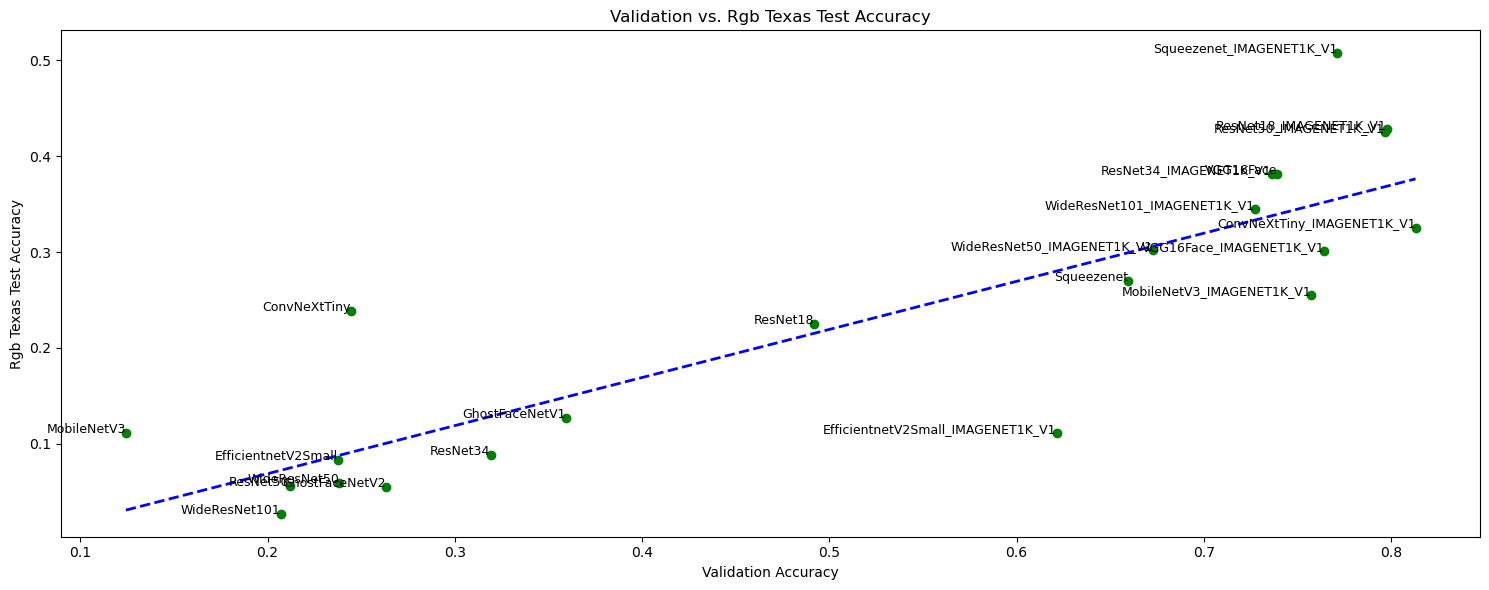

Correlation coefficient: 0.865


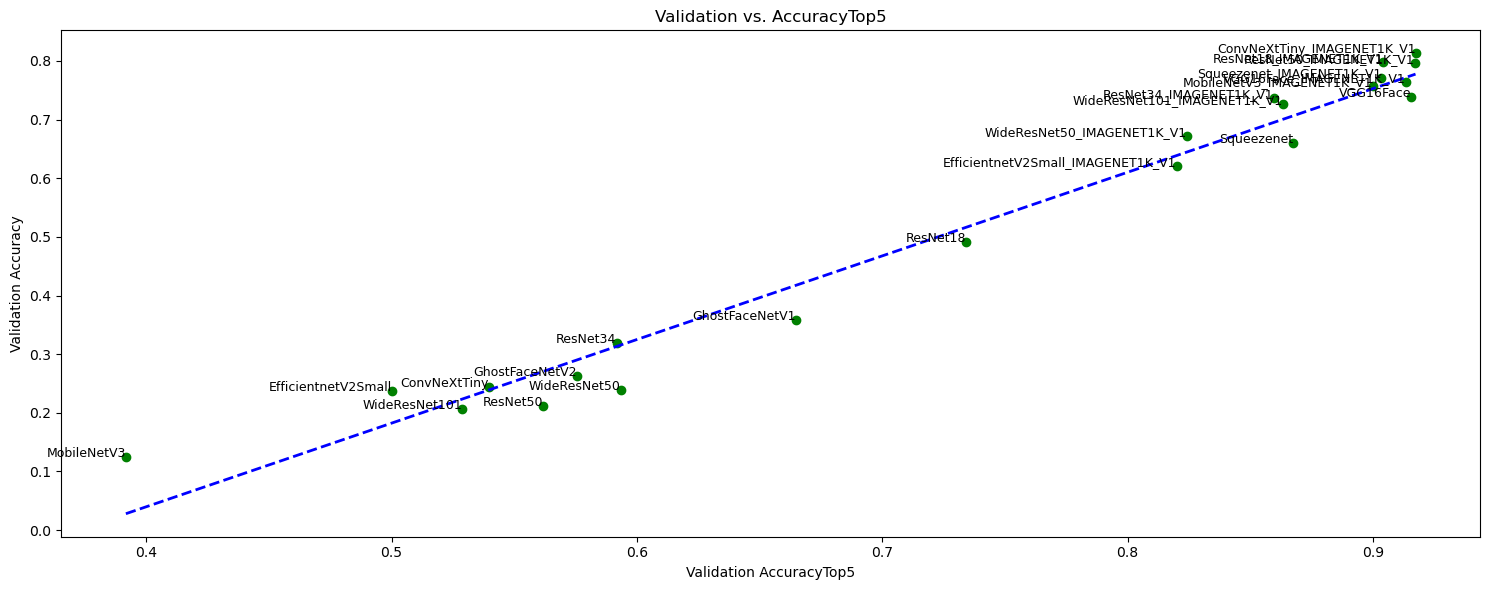

Correlation coefficient: 0.986


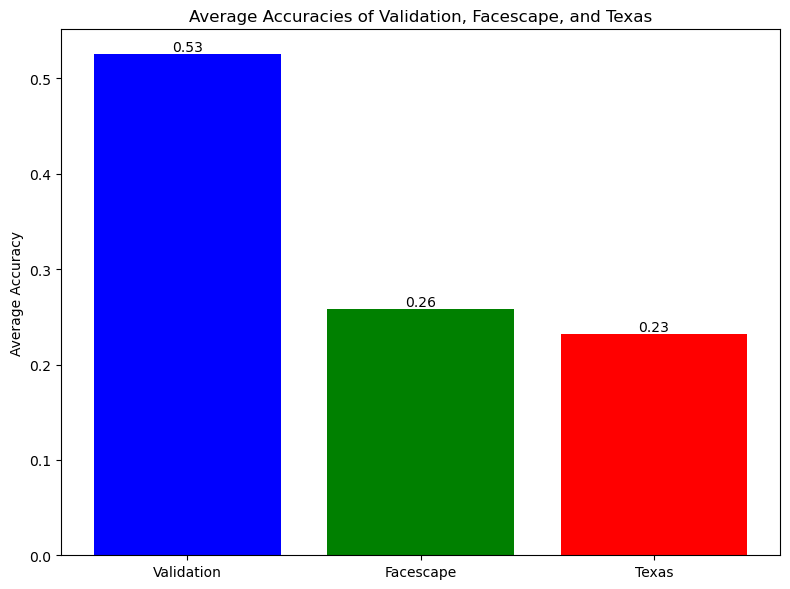

In [18]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP11:RGB_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8', 'rgb')

## EXP12:DEPTH_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8

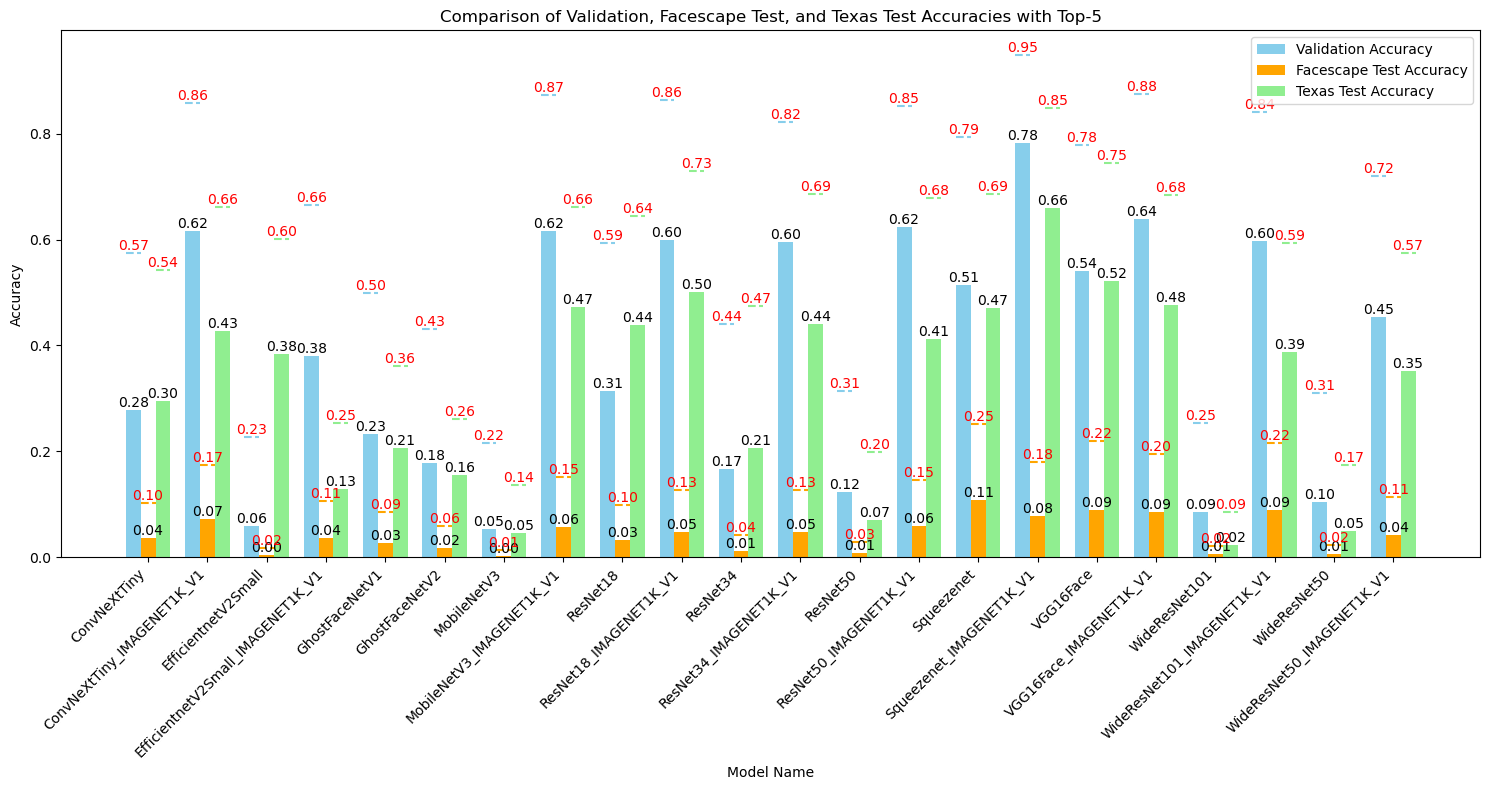

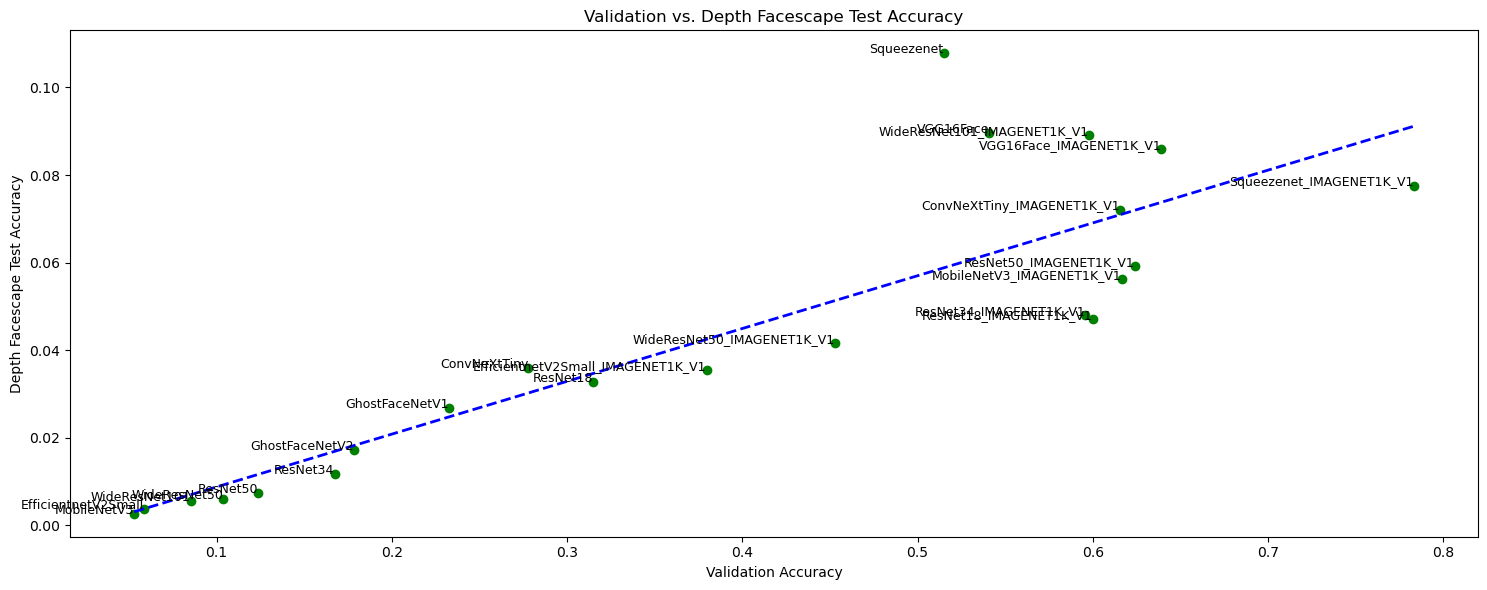

Correlation coefficient: 0.869


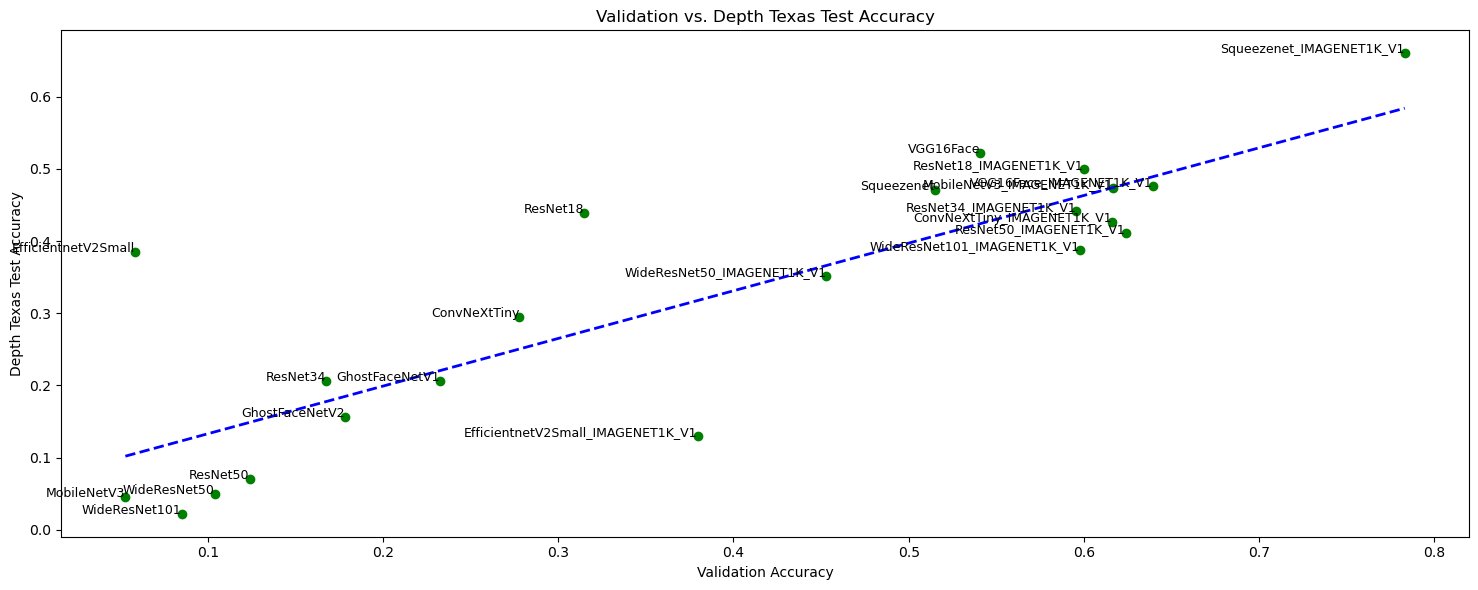

Correlation coefficient: 0.843


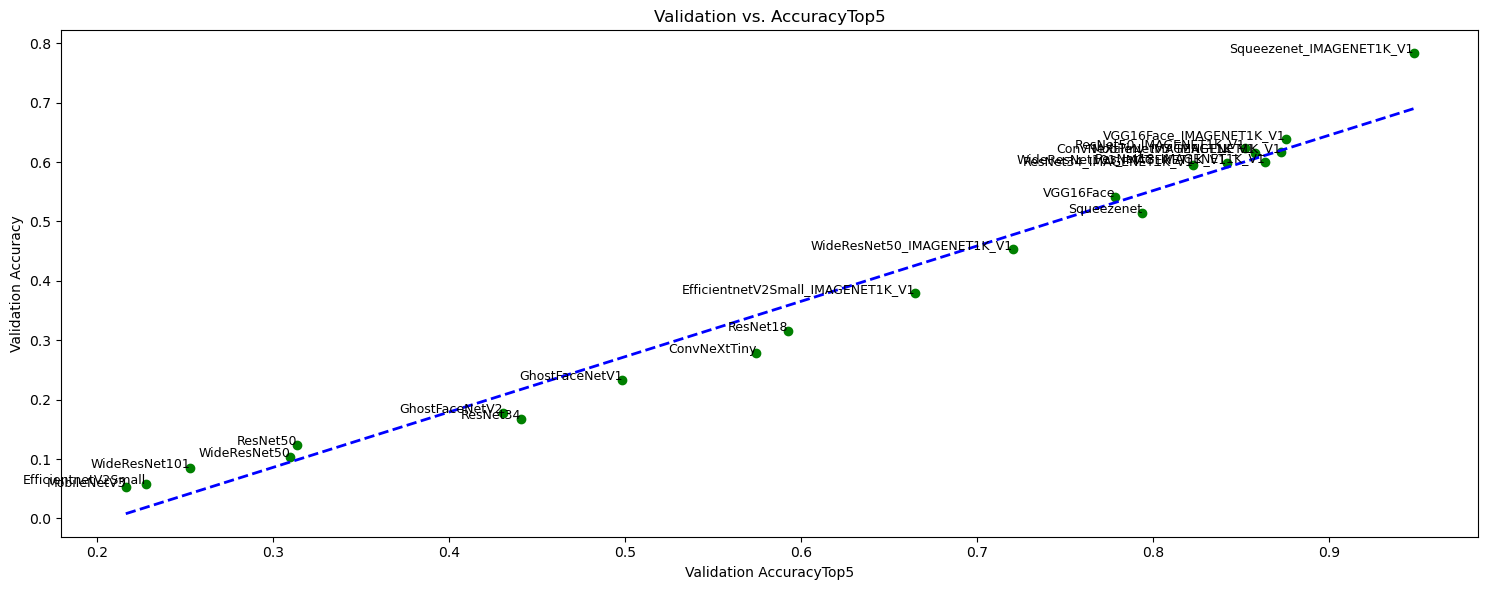

Correlation coefficient: 0.986


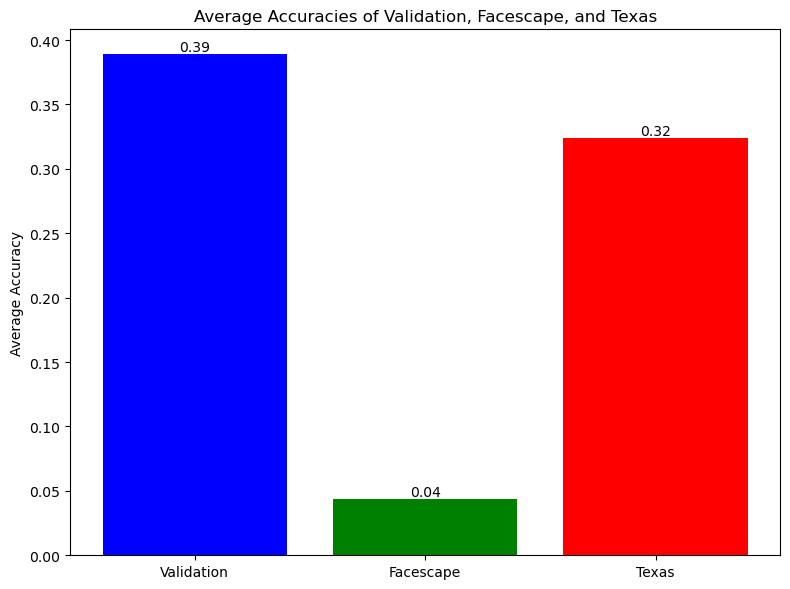

In [19]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP12:DEPTH_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8', 'depth')

## Analye Parametersize correlation:

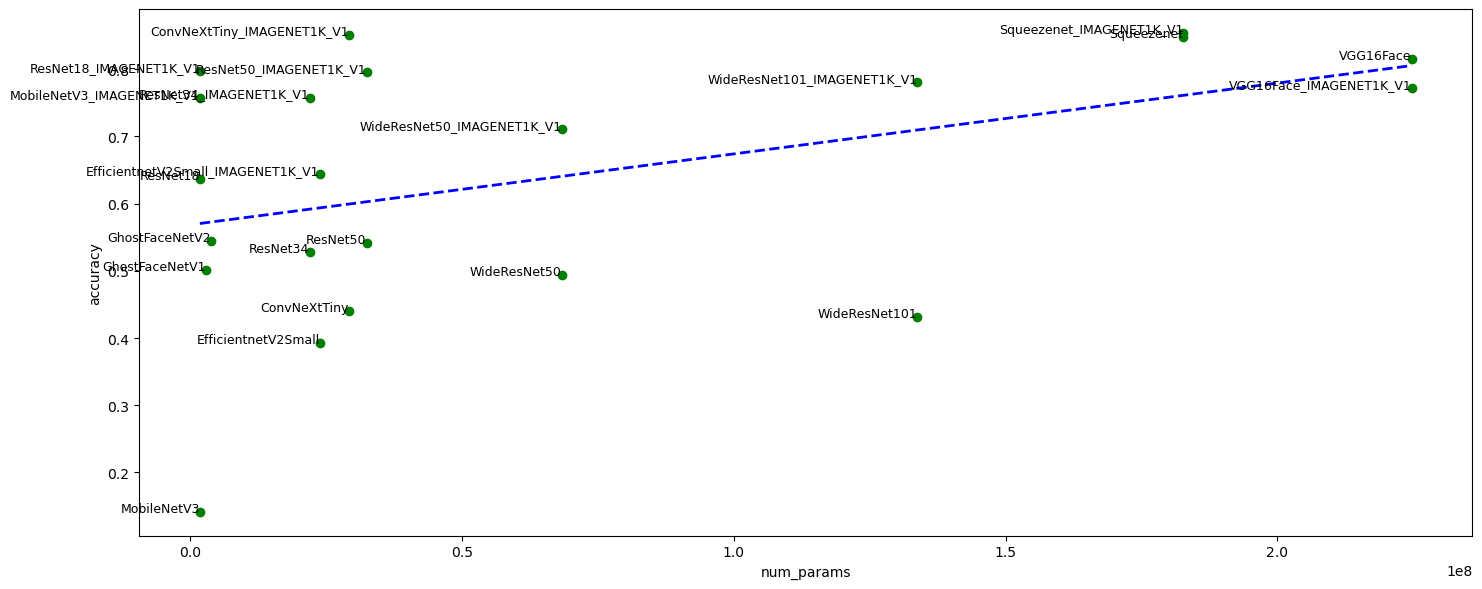

Correlation coefficient: 0.428


In [20]:
num_params = {"VGG16Face": 224696256,
        "VGG16Face_IMAGENET1K_V1": 224696256,
        "ResNet18": 1833152,
        "ResNet18_IMAGENET1K_V1": 1833152,
        "ResNet34": 21941312,
        "ResNet34_IMAGENET1K_V1": 21941312,
        "ResNet50": 32425280,
        "ResNet50_IMAGENET1K_V1": 32425280,
        "ConvNeXtTiny": 29196640,
        "ConvNeXtTiny_IMAGENET1K_V1": 29196640,
        "EfficientnetV2Small": 23784784,
        "EfficientnetV2Small_IMAGENET1K_V1": 23784784,
        "Squeezenet": 182654784,
        "Squeezenet_IMAGENET1K_V1": 182654784,
        "Shufflenet": 108736996,
        "Shufflenet_IMAGENET1K_V1": 108736996,
        "MobileNetV3":1739424,
        "MobileNetV3_IMAGENET1K_V1": 1739424,
        "WideResNet50": 68277312,
        "WideResNet50_IMAGENET1K_V1": 68277312,
        "WideResNet101": 133754944,
        "WideResNet101_IMAGENET1K_V1": 133754944,
        "GhostFaceNetV1": 2843565,
        "GhostFaceNetV2": 3817965}

dictlist = []
models = []
for key, value in num_params.items():
    temp = [key,value]
    dictlist.append(value)
    models.append(key)
models = pd.DataFrame(models)



combined_df = load_dataframe(directory)
grouped = combined_df.groupby('model_name')['accuracy_list'].max()
#print(grouped)

# Now, you want to match the model names with the 'num_params' dictionary and get a list of tuples.
x = []
y = []
labels = []
for model_name, max_accuracy in grouped.items():
    # Look up the number of parameters in 'num_params' dictionary using the model name.
    num_parameters = num_params.get(model_name)
    if num_parameters is not None:
        # If the model name exists in the 'num_params' dictionary, append the tuple to the result list.
        y.append(max_accuracy[0])
        x.append(num_parameters)
        labels.append(model_name)

plt.figure(figsize=(15, 6))
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
val_linspace = np.linspace(min(x), max(x), len(x))
plt.scatter(x, y, color='green')
plt.plot(val_linspace, poly(val_linspace), color='blue', linestyle='dashed', linewidth=2)
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=9, ha='right')
plt.xlabel('num_params')
plt.ylabel('accuracy')
plt.tight_layout()
plt.show()
correlation_coefficient, _ = pearsonr(x, y)
print(f"Correlation coefficient: {correlation_coefficient:.3f}")

## EXP13:RGBD_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8

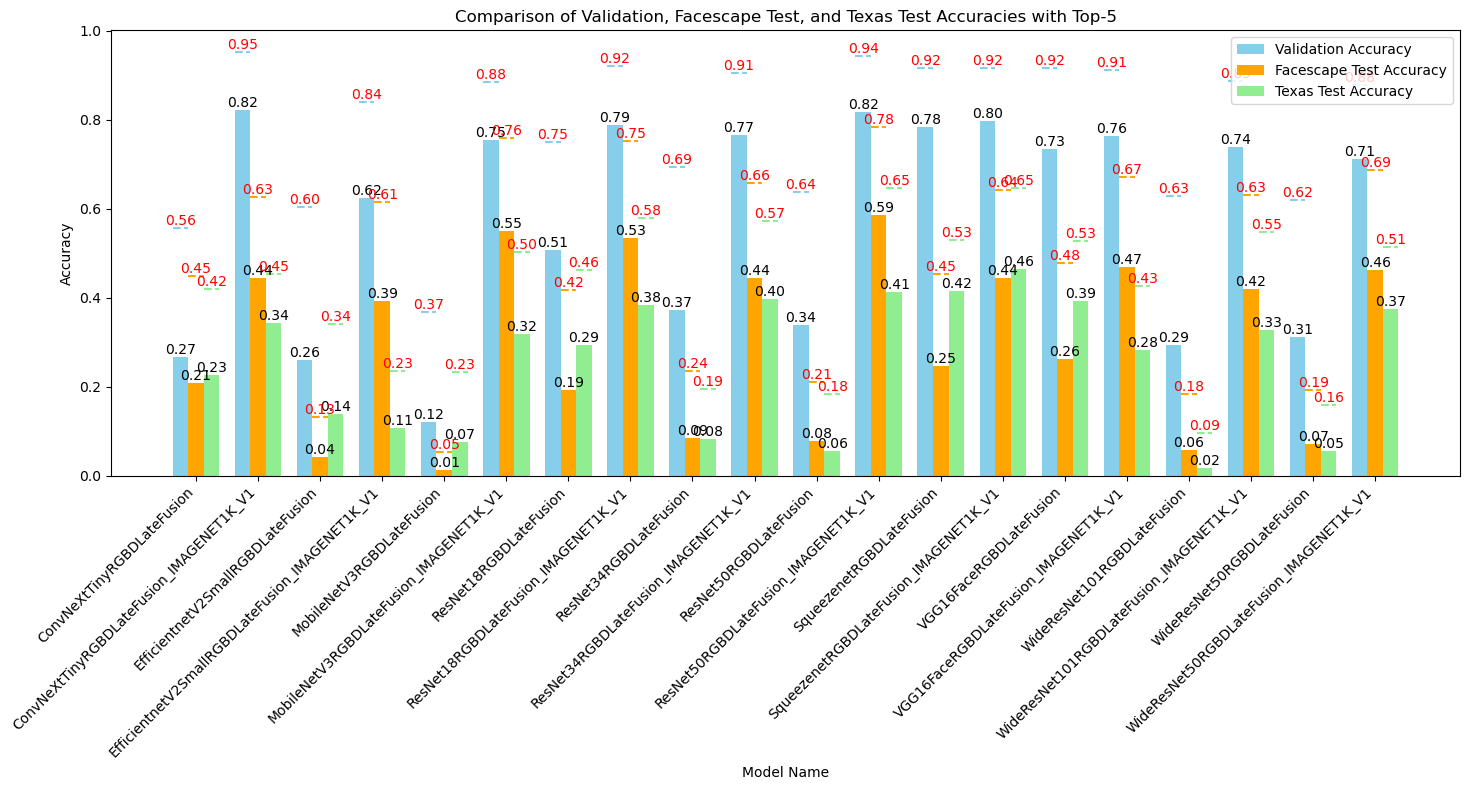

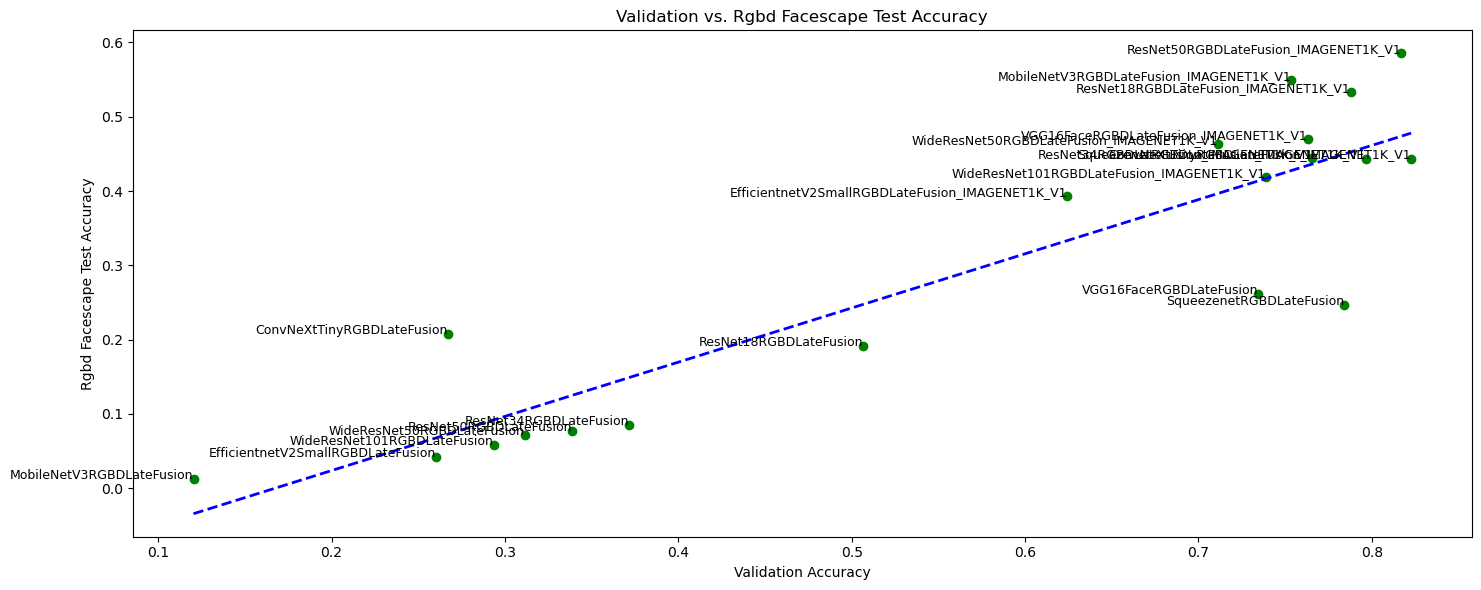

Correlation coefficient: 0.896


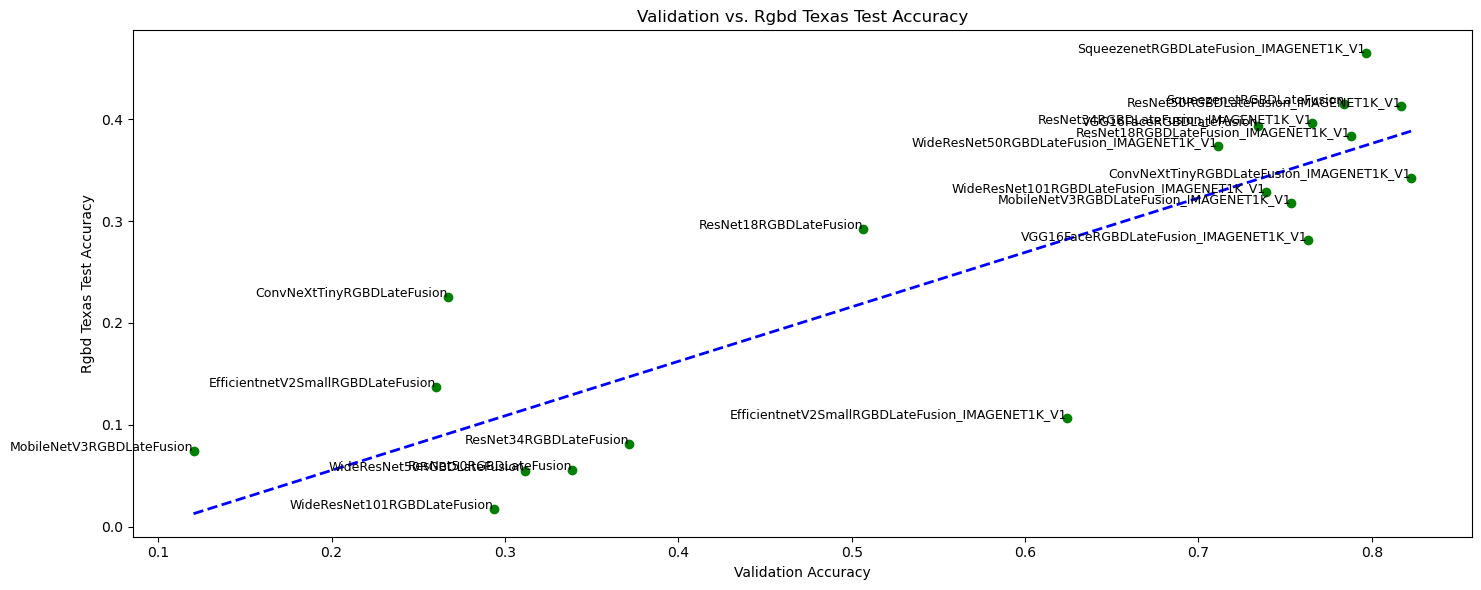

Correlation coefficient: 0.861


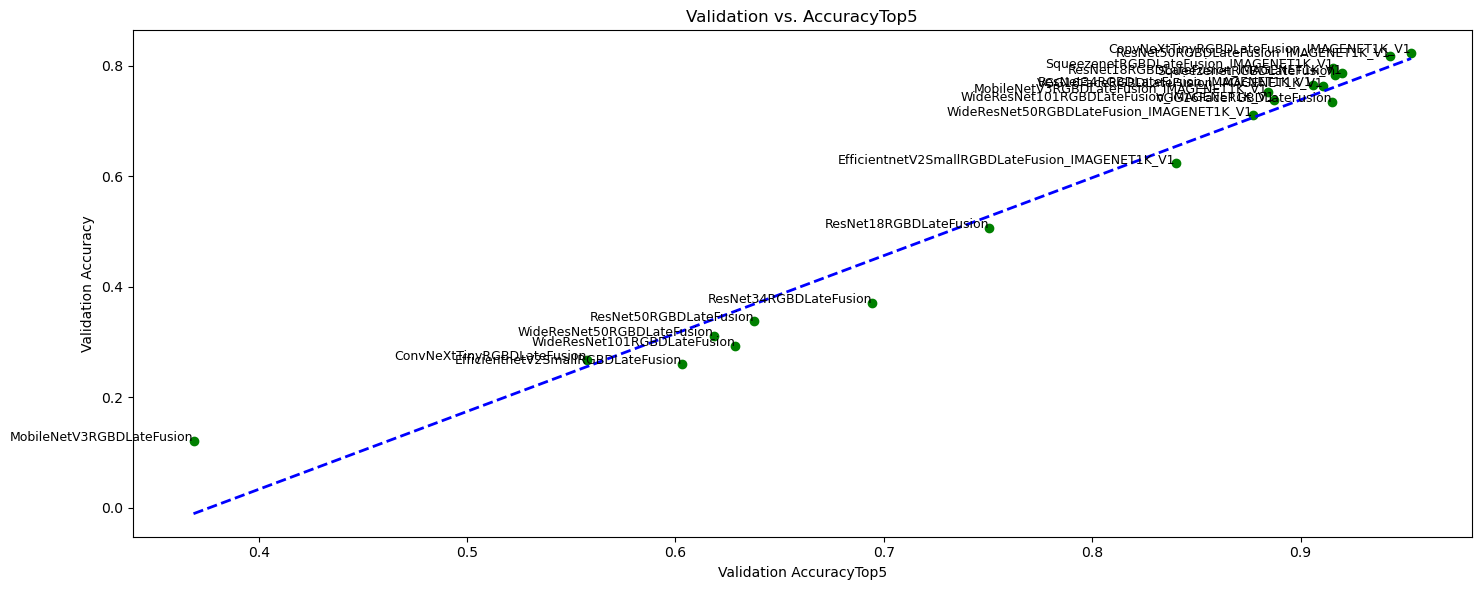

Correlation coefficient: 0.982


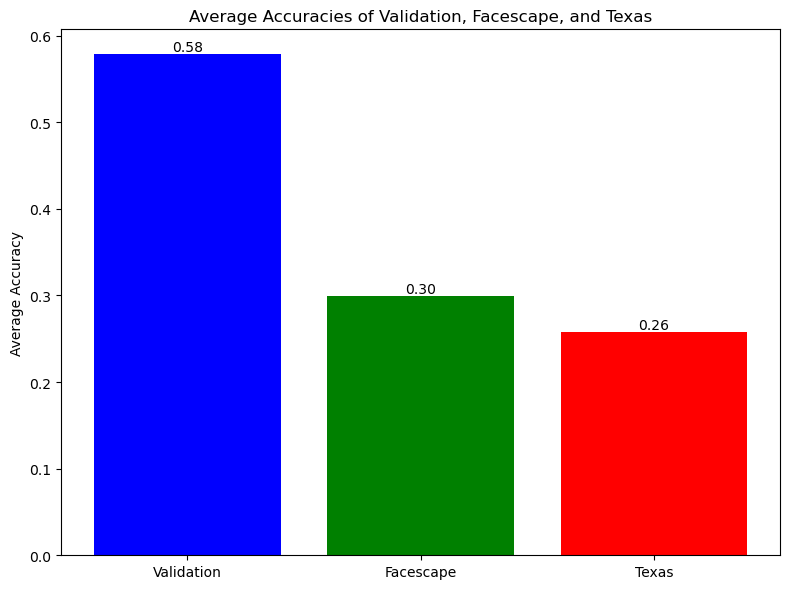

In [24]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP13:RGBD_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8', 'rgbd')

## EXP14:Photos_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8

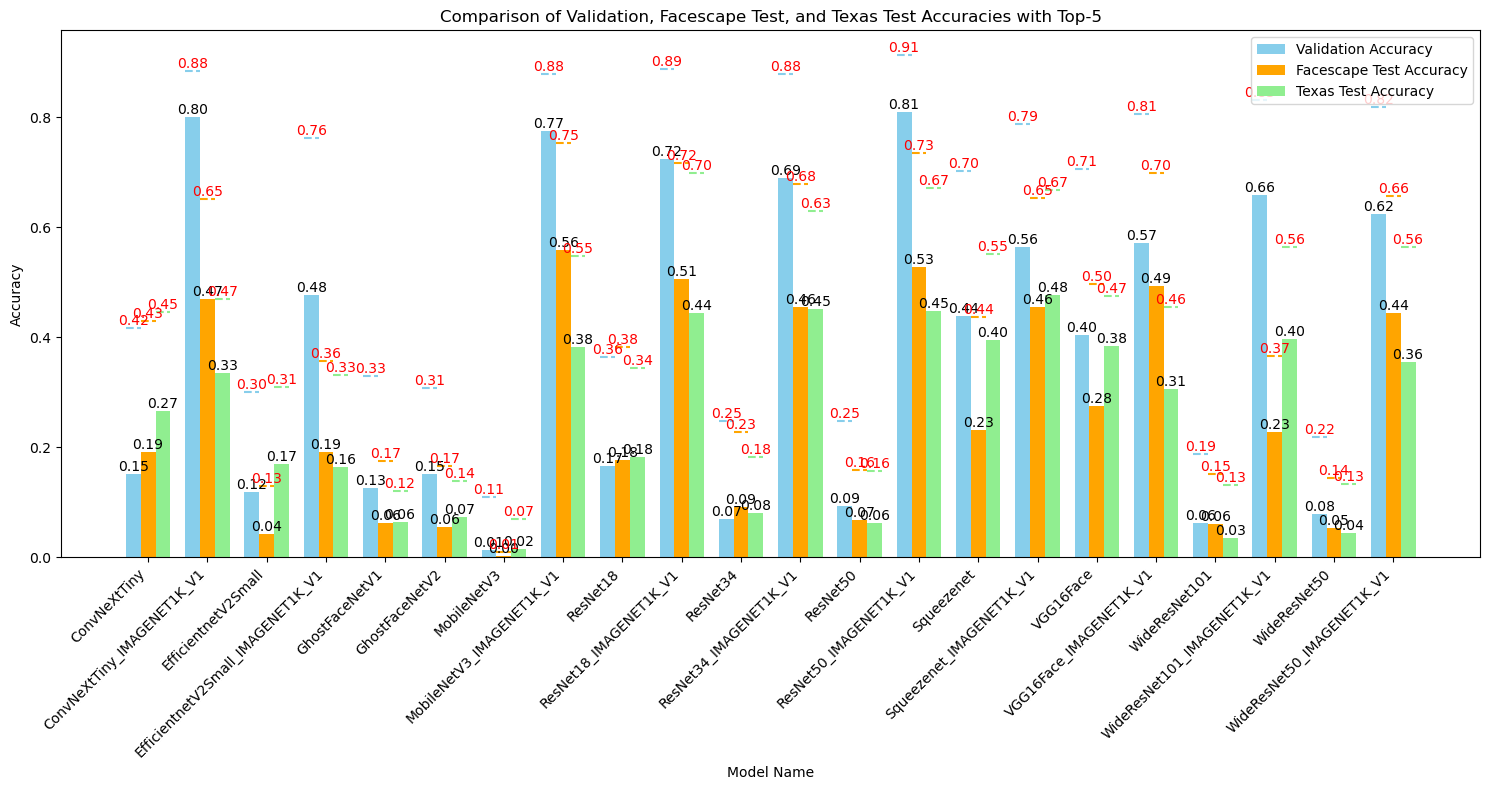

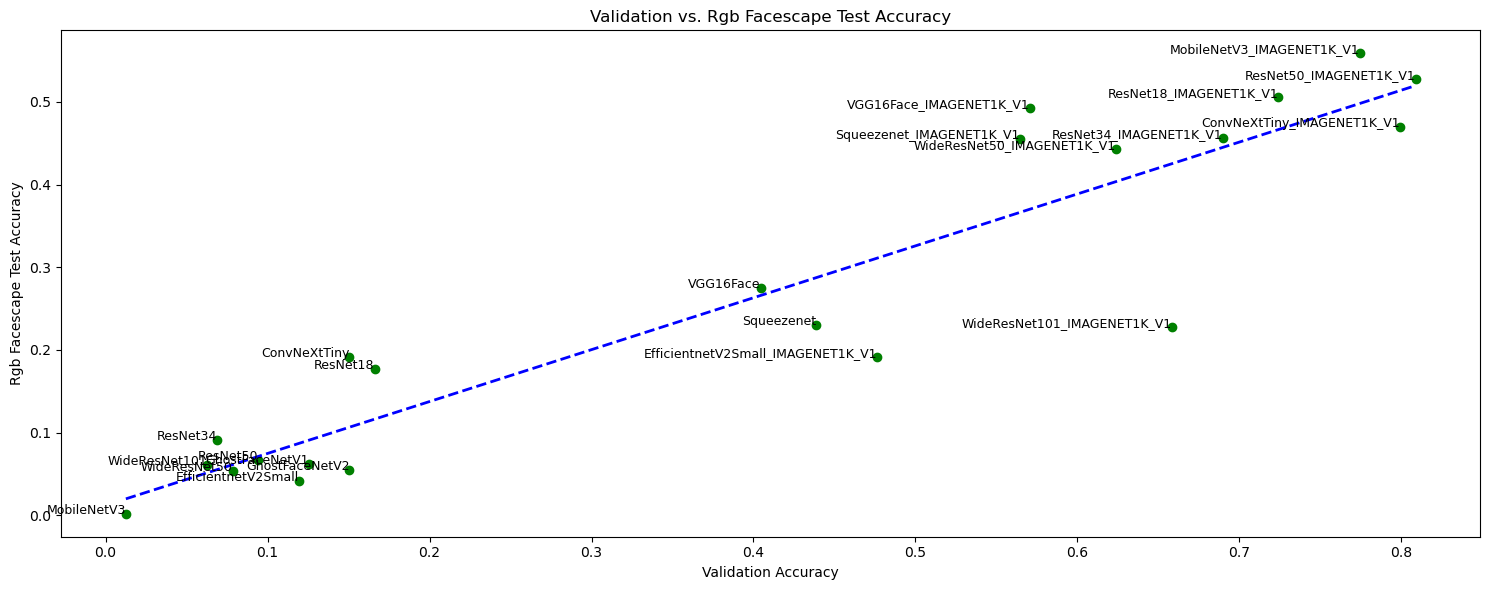

Correlation coefficient: 0.930


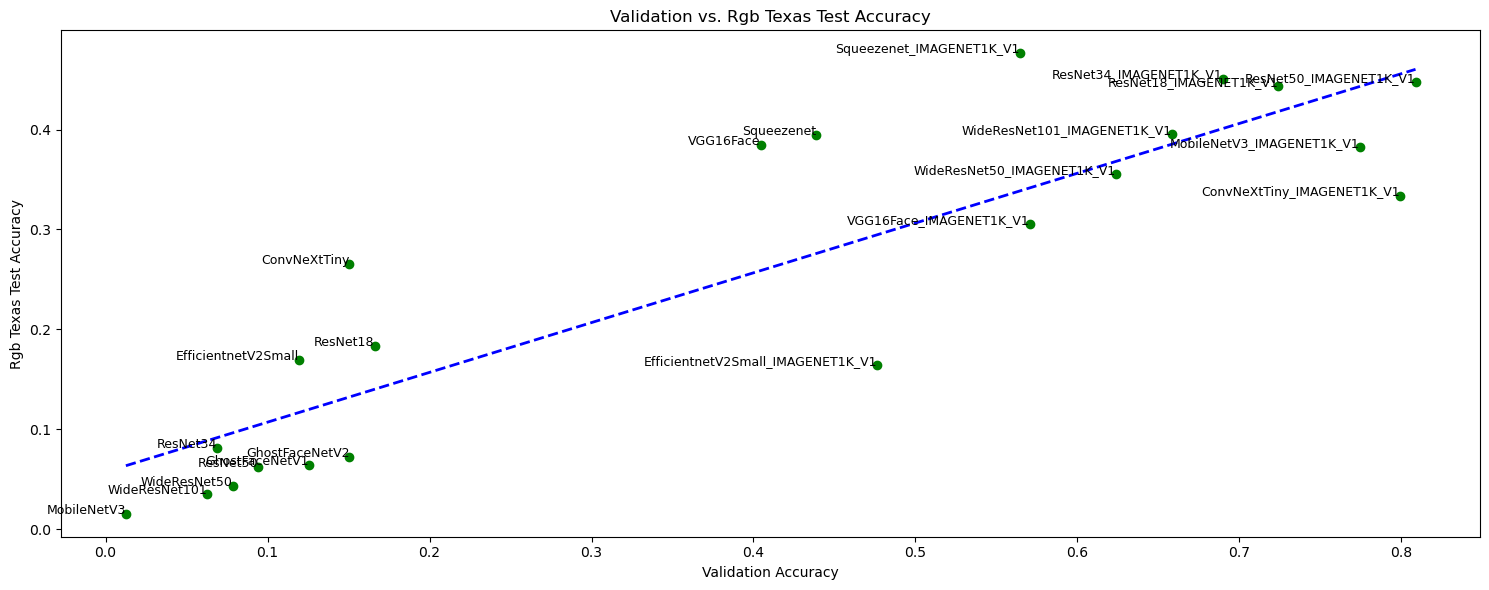

Correlation coefficient: 0.878


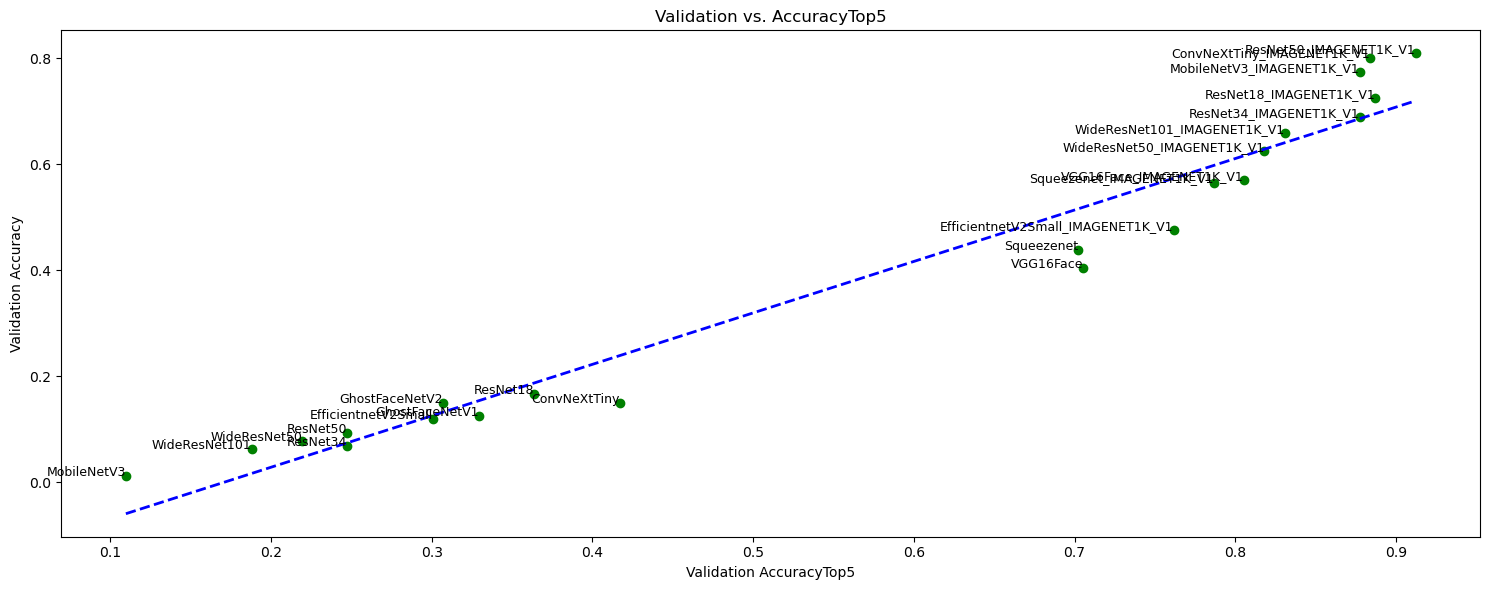

Correlation coefficient: 0.977


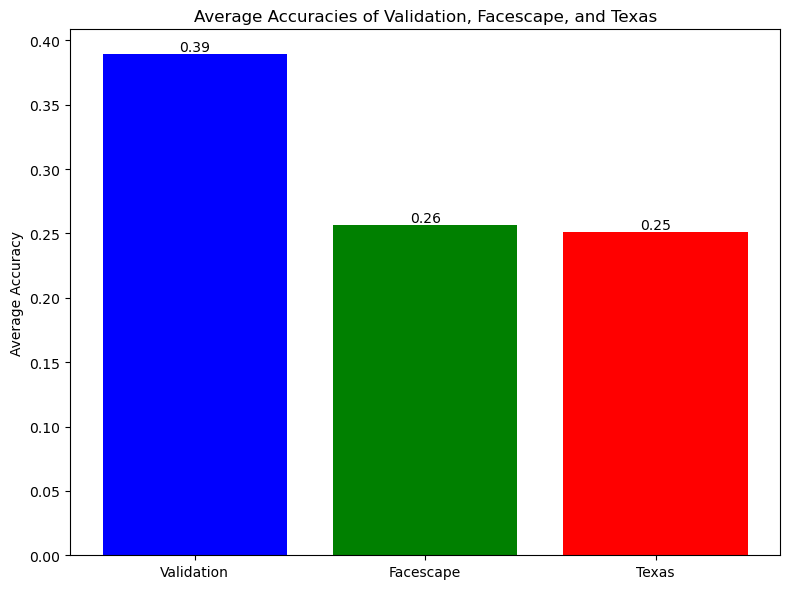

In [8]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP14:Photos_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8', 'rgb')